# Airline Data Exploration
## by (Abeer Mousa)


## Research Questions 

1. What percentage of flights are canceled or diverted out of the total number of flights?
2. Is there a relationship between the number of cancellations and the time of year (quarters) or days of the week?
3. How do the causes of cancellations vary by quarter and day of the week?
4. What is the distribution pattern of flight delays?




## Dataset Overview

The airline dataset provides a detailed record of flight information, compiled from multiple flights across different years. It includes a wide range of features related to various aspects of flight operations:

1. General Flight Information: This includes temporal details such as Year, Quarter, Month, Day of the Month, and Day of the Week.
2. Origin and Destination Information : Origin, OriginCityName, OriginState, OriginStateFips, OriginStateName, OriginWac: Various details about the origin airport, including codes, city name, state name, and geographic information.
3. Dest, DestCityName, DestState, DestStateFips, DestStateName, DestWac: Details about the destination airport, including codes, city name, state name, and geographic information. 
4. Departure Information: CRSDepTime, DepTime, DepDelay, DepDelayMinutes, DepDel15, DepartureDelayGroups: Scheduled and actual departure times, along with various delay metrics, providing insights into how on-time or delayed departures were.
5. Arrival Information: CRSArrTime, ArrTime, ArrDelay, ArrDelayMinutes, ArrDel15, ArrivalDelayGroups: Scheduled and actual arrival times, along with various delay metrics, providing insights into arrival performance.
6. Cancelled, CancellationCode, Diverted: Indicators of whether a flight was canceled or diverted, along with codes explaining the reason for cancellation.
7. Flights, Distance, DistanceGroup: Metrics related to the flight count and the distance covered, with DistanceGroup likely categorizing flights into distance ranges.
8. Delay Breakdown: CarrierDelay, WeatherDelay, NASDelay, SecurityDelay, LateAircraftDelay: These columns break down the reasons for delays into categories like carrier issues, weather, air traffic control (NAS), security, and delays due to late aircraft.

## Imports 

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import os

%matplotlib inline

## Reusable functions - lib

### Check unique Values

In [97]:
## Check unique Values
def check_unique_values(df, columns):
  print('Number of unique values per column')
  for column in columns:
    print('----------------------------------')
    print('{} has {} unique values:'.format(column,len(df[column].unique())))
    print('----------------------------------')
    print(df[column].unique())

### Check for Outliers

In [98]:
# Check for Outliers
def Check_for_Outliers(df, column, sort_by, upper_bound=None ):
    summaries = df.describe().loc[['mean', 'std']]
    if (upper_bound is None):
      upper_bound = summaries[column]['mean'] + summaries[column]['std'] 
    lower_bound = summaries[column]['mean'] - summaries[column]['std'] 
    print('upper_bound = {} | lower_bound = {}'.format(upper_bound, lower_bound))
    print('Count of outlier more than upper_bound = {}'.format(len(df[df[column] > upper_bound ])))
    print('percentage  of outlier more than upper_bound = {}%'.format(round((len(df[df[column] > upper_bound ])
                                                                     / len(df))*100,2)))

### Set Default Figure Size

In [99]:
def get_fig_size(fig_size=None):
    default_size = (10, 15)
    
    if fig_size is None:
        return default_size
    else:
        return fig_size

### Pie chart

In [100]:
def pie_chart(df, column, title, labels=None):
   sorted_counts = df[column].value_counts()
   size = get_fig_size()
   if labels is None or len(labels) == 0:
      labels = sorted_counts.index

   wedges, texts, autotexts = plt.pie( sorted_counts, startangle = 90, autopct='%1.1f%%', counterclock = False)
   plt.title(title, pad= 20)
   plt.axis('equal')
   plt.legend(wedges, labels, title="Categories", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

### Bar Chart

In [220]:
def bar_chart(df, column, title, labels=None):

   # Return the Series having unique values
   x = df[column].unique()

   # Return the Series having frequency count of each unique value
   y = df[column].value_counts(sort=False)

   if(labels == None):
       bars = plt.bar(df[column].unique(), y) 
   else:     
       bars = plt.bar(labels, y)  

   for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height}', ha='center', va='bottom')

   #plt.figure(figsize=get_fig_size())
   plt.ylabel('count')
   plt.title(title, pad= 20)

### Two Histogram Plots

In [102]:
def two_hist_chart(df, columns, titles, xyLabels, bin_size=1):
  plt.figure(figsize = [20, 5]) 

  # histogram on left, example of too-large bin size
  # 1 row, 2 cols, subplot 1
  plt.subplot(1, 2, 1) 
  bins = np.arange(-2, df[columns[0]].max()+bin_size, bin_size)
  plt.title(titles[0], pad= 20)
  plt.xlabel(xyLabels[0])
  plt.ylabel('Frequency')
  plt.hist(data = df, x = columns[0], bins = bins);


  # histogram on right, example of too-small bin size
  plt.subplot(1, 2, 2) # 1 row, 2 cols, subplot 2
  bins = np.arange(-2, df[columns[1]].max()+bin_size, bin_size)
  plt.title(titles[1], pad= 20)
  plt.xlabel(xyLabels[1])
  plt.ylabel('Frequency')
  plt.hist(data = df, x = columns[1], bins = bins);
    

### Clustered Bar Charts

In [103]:
def clustered_bar_chart(df, value_column, class_column, title, xyLabels):
  sns.countplot(data=df, x=value_column, hue=class_column)
  plt.legend(loc='upper right', bbox_to_anchor=(1.25, 1), fontsize='small', title='')
  plt.xticks(ticks=np.arange(len(df[value_column].unique())) + 0.2, labels=df[value_column].unique())
  plt.title(title)
  plt.xlabel(xyLabels[0])
  plt.ylabel(xyLabels[1])

### Scatter plot

In [104]:
def Scatter_plot(df, columns, title, xyLabels):
  plt.scatter(data=df, x=columns[0], y=columns[1])
  plt.title(title)
  plt.xlabel(xyLabels[0])
  plt.ylabel(xyLabels[1])

### Regression Plot

In [105]:
def regression_scatter_plot(df, columns, title, xyLabels):
  sns.regplot(data=df, x=columns[0], y=columns[1]);
  plt.title(title)
  plt.xlabel(xyLabels[0])
  plt.ylabel(xyLabels[1])

### Box Plot

In [106]:
def box_plot(df, class_column, classes, value_column, title, xyLabels):


   ax1 = sns.boxplot(data=df, x=class_column, y=value_column, color='tab:blue')
   plt.xticks(rotation=15);
   plt.title(title)
   plt.xlabel(xyLabels[0])
   plt.ylabel(xyLabels[1])
   plt.ylim(ax1.get_ylim())

### Heat Map

In [234]:
def heat_map(df, columns, title, xyLabels):
    # Specify bin edges 
    # bins_x = np.arange(0.6, 7+0.3, 0.3)
    # bins_y = np.arange(12, 58+3, 3)

   plt.hist2d(data=df, x=columns[0], y=columns[1], cmin=1, cmap='viridis_r' )
   plt.colorbar()
   plt.title(title)
   plt.xlabel(xyLabels[0])
   plt.ylabel(xyLabels[1]);

###  FacetGrid

In [108]:
def FacetGrid(df, value_column, class_column, bin_size, title, xyLabels):

    bins = np.arange(-2, df[value_column].max() + bin_size, bin_size)
    g = sns.FacetGrid(data=df, col=class_column, col_wrap=2)
    

    g.map(plt.hist, value_column, bins=bins)
    g.set_axis_labels(xyLabels[0], xyLabels[1])
    
    plt.show()

In [109]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

## Loading Data

In [3]:
print(os.getcwd())

C:\Users\User\Udacity\data_analysis\finalProject


Change the work directory

In [4]:
os.chdir('C:/Users/User/Udacity/data_analysis/finalProject')

Load Data 

In [9]:
# load in the dataset into a pandas dataframe, print statistics
df = pd.read_csv('c:/Users/User/Udacity/data_analysis/finalProject/airline_2m/airline_2m.csv',encoding='ISO-8859-1')

C:\Users\User\AppData\Local\Temp\ipykernel_18896\1473759456.py:2: DtypeWarning: Columns (69,76,77,84) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('c:/Users/User/Udacity/data_analysis/finalProject/airline_2m/airline_2m.csv',encoding='ISO-8859-1')


## Browsing Data

In [113]:
# high-level overview of data shape and composition
print(df.shape)
print(df.dtypes)
print(df.head(10))

(2000000, 109)
Year                  int64
Quarter               int64
Month                 int64
DayofMonth            int64
DayOfWeek             int64
                     ...   
Div5WheelsOn        float64
Div5TotalGTime      float64
Div5LongestGTime    float64
Div5WheelsOff       float64
Div5TailNum         float64
Length: 109, dtype: object
   Year  Quarter  Month  DayofMonth  DayOfWeek  FlightDate Reporting_Airline  \
0  1998        1      1           2          5  1998-01-02                NW   
1  2009        2      5          28          4  2009-05-28                FL   
2  2013        2      6          29          6  2013-06-29                MQ   
3  2010        3      8          31          2  2010-08-31                DL   
4  2006        1      1          15          7  2006-01-15                US   
5  1995        4     11          29          3  1995-11-29                DL   
6  2006        3      8           7          1  2006-08-07                CO   
7  2019   

In [114]:
df.iloc[:,:20].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000000 entries, 0 to 1999999
Data columns (total 20 columns):
 #   Column                           Dtype  
---  ------                           -----  
 0   Year                             int64  
 1   Quarter                          int64  
 2   Month                            int64  
 3   DayofMonth                       int64  
 4   DayOfWeek                        int64  
 5   FlightDate                       object 
 6   Reporting_Airline                object 
 7   DOT_ID_Reporting_Airline         int64  
 8   IATA_CODE_Reporting_Airline      object 
 9   Tail_Number                      object 
 10  Flight_Number_Reporting_Airline  int64  
 11  OriginAirportID                  int64  
 12  OriginAirportSeqID               int64  
 13  OriginCityMarketID               int64  
 14  Origin                           object 
 15  OriginCityName                   object 
 16  OriginState                      object 
 17  OriginSt

In [115]:
df.iloc[:, :20].head()

,Year,Quarter,Month,DayofMonth,DayOfWeek,FlightDate,Reporting_Airline,DOT_ID_Reporting_Airline,IATA_CODE_Reporting_Airline,Tail_Number,Flight_Number_Reporting_Airline,OriginAirportID,OriginAirportSeqID,OriginCityMarketID,Origin,OriginCityName,OriginState,OriginStateFips,OriginStateName,OriginWac
0,1998,1,1,2,5,1998-01-02,NW,19386,NW,N297US,675,13487,1348701,31650,MSP,"Minneapolis, MN",MN,27.0,Minnesota,63
1,2009,2,5,28,4,2009-05-28,FL,20437,FL,N946AT,671,13342,1334202,33342,MKE,"Milwaukee, WI",WI,55.0,Wisconsin,45
2,2013,2,6,29,6,2013-06-29,MQ,20398,MQ,N665MQ,3297,11921,1192102,31921,GJT,"Grand Junction, CO",CO,8.0,Colorado,82
3,2010,3,8,31,2,2010-08-31,DL,19790,DL,N6705Y,1806,12892,1289201,32575,LAX,"Los Angeles, CA",CA,6.0,California,91
4,2006,1,1,15,7,2006-01-15,US,20355,US,N504AU,465,11618,1161801,31703,EWR,"Newark, NJ",NJ,34.0,New Jersey,21


In [116]:
df.iloc[:, :20].describe()

,Year,Quarter,Month,DayofMonth,DayOfWeek,DOT_ID_Reporting_Airline,Flight_Number_Reporting_Airline,OriginAirportID,OriginAirportSeqID,OriginCityMarketID,OriginStateFips,OriginWac
count,2.000000e+06,2.000000e+06,2.000000e+06,2.000000e+06,2.000000e+06,2.000000e+06,2.000000e+06,2.000000e+06,2.000000e+06,2.000000e+06,1.999354e+06,2.000000e+06
mean,2.004314e+03,2.501267e+00,6.500761e+00,1.572202e+01,3.937445e+00,1.992450e+04,1.719375e+03,1.271899e+04,1.271901e+06,3.173373e+04,2.687446e+01,5.522946e+01
std,9.228930e+00,1.118022e+00,3.443460e+00,8.778412e+00,1.990369e+00,3.665827e+02,1.659726e+03,1.534529e+03,1.534527e+05,1.302432e+03,1.643874e+01,2.682221e+01
min,1.987000e+03,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.938600e+04,1.000000e+00,1.013500e+04,1.013501e+06,3.007000e+04,1.000000e+00,1.000000e+00
25%,1.997000e+03,1.000000e+00,3.000000e+00,8.000000e+00,2.000000e+00,1.970400e+04,5.220000e+02,1.129200e+04,1.129202e+06,3.064700e+04,1.200000e+01,3.400000e+01
50%,2.005000e+03,3.000000e+00,7.000000e+00,1.600000e+01,4.000000e+00,1.980500e+04,1.170000e+03,1.289200e+04,1.289201e+06,3.145300e+04,2.600000e+01,5.200000e+01
75%,2.012000e+03,3.000000e+00,9.000000e+00,2.300000e+01,6.000000e+00,2.035500e+04,2.211000e+03,1.405700e+04,1.405702e+06,3.257500e+04,4.200000e+01,8.100000e+01
max,2.020000e+03,4.000000e+00,1.200000e+01,3.100000e+01,7.000000e+00,2.117100e+04,9.794000e+03,1.686900e+04,1.686901e+06,3.610100e+04,7.800000e+01,8.410000e+02


lets check 'Flight_Number_Reporting_Airline' or 'DOT_ID_Reporting_Airline' by checking the number of unique values which should equal the number of observation if this is the unique identifier.

In [117]:
check_unique_values(df, ['Flight_Number_Reporting_Airline','DOT_ID_Reporting_Airline'])

Number of unique values per column
----------------------------------
Flight_Number_Reporting_Airline has 8050 unique values:
----------------------------------
[ 675  671 3297 ... 9519 7917 7645]
----------------------------------
DOT_ID_Reporting_Airline has 34 unique values:
----------------------------------
[19386 20437 20398 19790 20355 19704 20363 20378 19393 19805 20304 19977
 19822 19930 20366 20452 20397 19991 20211 20404 20409 19690 20374 20416
 20436 19391 19707 20368 20417 21171 20312 19678 20384 20295]


Result : both are not

In [118]:
df.iloc[:, 20:40].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000000 entries, 0 to 1999999
Data columns (total 20 columns):
 #   Column                Dtype  
---  ------                -----  
 0   DestAirportID         int64  
 1   DestAirportSeqID      int64  
 2   DestCityMarketID      int64  
 3   Dest                  object 
 4   DestCityName          object 
 5   DestState             object 
 6   DestStateFips         float64
 7   DestStateName         object 
 8   DestWac               int64  
 9   CRSDepTime            int64  
 10  DepTime               float64
 11  DepDelay              float64
 12  DepDelayMinutes       float64
 13  DepDel15              float64
 14  DepartureDelayGroups  float64
 15  DepTimeBlk            object 
 16  TaxiOut               float64
 17  WheelsOff             float64
 18  WheelsOn              float64
 19  TaxiIn                float64
dtypes: float64(10), int64(5), object(5)
memory usage: 305.2+ MB


In [119]:
df.iloc[:, 20:40].head()

,DestAirportID,DestAirportSeqID,DestCityMarketID,Dest,DestCityName,DestState,DestStateFips,DestStateName,DestWac,CRSDepTime,DepTime,DepDelay,DepDelayMinutes,DepDel15,DepartureDelayGroups,DepTimeBlk,TaxiOut,WheelsOff,WheelsOn,TaxiIn
0,14869,1486902,34614,SLC,"Salt Lake City, UT",UT,49.0,Utah,87,1640,1659.0,19.0,19.0,1.0,1.0,1600-1659,24.0,1723.0,1856.0,3.0
1,13204,1320401,31454,MCO,"Orlando, FL",FL,12.0,Florida,33,1204,1202.0,-2.0,0.0,0.0,-1.0,1200-1259,10.0,1212.0,1533.0,8.0
2,11298,1129803,30194,DFW,"Dallas/Fort Worth, TX",TX,48.0,Texas,74,1630,1644.0,14.0,14.0,0.0,0.0,1600-1659,9.0,1653.0,1936.0,6.0
3,11433,1143301,31295,DTW,"Detroit, MI",MI,26.0,Michigan,43,1305,1305.0,0.0,0.0,0.0,0.0,1300-1359,23.0,1328.0,2008.0,7.0
4,11057,1105702,31057,CLT,"Charlotte, NC",NC,37.0,North Carolina,36,1820,1911.0,51.0,51.0,1.0,3.0,1800-1859,19.0,1930.0,2050.0,8.0


In [120]:
df.iloc[:, 20:40].describe()

,DestAirportID,DestAirportSeqID,DestCityMarketID,DestStateFips,DestWac,CRSDepTime,DepTime,DepDelay,DepDelayMinutes,DepDel15,DepartureDelayGroups,TaxiOut,WheelsOff,WheelsOn,TaxiIn
count,2.000000e+06,2.000000e+06,2.000000e+06,1.999406e+06,2.000000e+06,2.000000e+06,1.963995e+06,1.963932e+06,1.963932e+06,1.963932e+06,1.963932e+06,1.584358e+06,1.584323e+06,1.582042e+06,1.582153e+06
mean,1.271924e+04,1.271925e+06,3.173239e+04,2.685666e+01,5.526029e+01,1.332350e+03,1.343248e+03,8.587405e+00,1.049667e+01,1.696362e-01,6.643356e-02,1.580659e+01,1.362872e+03,1.479911e+03,6.714089e+00
std,1.534860e+03,1.534858e+05,1.302004e+03,1.643312e+01,2.678134e+01,4.765702e+02,4.818427e+02,3.272473e+01,3.196467e+01,3.753130e-01,1.824514e+00,1.023564e+01,4.855511e+02,5.065056e+02,7.948352e+00
min,1.013500e+04,1.013501e+06,3.007000e+04,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,-9.900000e+02,0.000000e+00,0.000000e+00,-2.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00
25%,1.129200e+04,1.129202e+06,3.064700e+04,1.200000e+01,3.400000e+01,9.250000e+02,9.300000e+02,-3.000000e+00,0.000000e+00,0.000000e+00,-1.000000e+00,1.000000e+01,9.440000e+02,1.105000e+03,4.000000e+00
50%,1.289200e+04,1.289201e+06,3.145300e+04,2.600000e+01,5.200000e+01,1.325000e+03,1.331000e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.300000e+01,1.344000e+03,1.513000e+03,5.000000e+00
75%,1.405700e+04,1.405702e+06,3.257500e+04,4.200000e+01,8.100000e+01,1.728000e+03,1.737000e+03,7.000000e+00,7.000000e+00,0.000000e+00,0.000000e+00,1.800000e+01,1.751000e+03,1.910000e+03,8.000000e+00
max,1.686900e+04,1.686901e+06,3.610100e+04,7.800000e+01,8.410000e+02,2.400000e+03,2.400000e+03,1.878000e+03,1.878000e+03,1.000000e+00,1.200000e+01,1.412000e+03,2.400000e+03,2.400000e+03,1.439000e+03


In [121]:
df.iloc[:, 40:60].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000000 entries, 0 to 1999999
Data columns (total 20 columns):
 #   Column              Dtype  
---  ------              -----  
 0   CRSArrTime          int64  
 1   ArrTime             float64
 2   ArrDelay            float64
 3   ArrDelayMinutes     float64
 4   ArrDel15            float64
 5   ArrivalDelayGroups  float64
 6   ArrTimeBlk          object 
 7   Cancelled           float64
 8   CancellationCode    object 
 9   Diverted            float64
 10  CRSElapsedTime      float64
 11  ActualElapsedTime   float64
 12  AirTime             float64
 13  Flights             float64
 14  Distance            float64
 15  DistanceGroup       int64  
 16  CarrierDelay        float64
 17  WeatherDelay        float64
 18  NASDelay            float64
 19  SecurityDelay       float64
dtypes: float64(16), int64(2), object(2)
memory usage: 305.2+ MB


In [122]:
df.iloc[:, 40:60].head(20)

,CRSArrTime,ArrTime,ArrDelay,ArrDelayMinutes,ArrDel15,ArrivalDelayGroups,ArrTimeBlk,Cancelled,CancellationCode,Diverted,CRSElapsedTime,ActualElapsedTime,AirTime,Flights,Distance,DistanceGroup,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay
0,1836,1859.0,23.0,23.0,1.0,1.0,1800-1859,0.0,NaN,0.0,176.0,180.0,153.0,1.0,991.0,4,NaN,NaN,NaN,NaN
1,1541,1541.0,0.0,0.0,0.0,0.0,1500-1559,0.0,NaN,0.0,157.0,159.0,141.0,1.0,1066.0,5,NaN,NaN,NaN,NaN
2,1945,1942.0,-3.0,0.0,0.0,-1.0,1900-1959,0.0,NaN,0.0,135.0,118.0,103.0,1.0,773.0,4,NaN,NaN,NaN,NaN
3,2035,2015.0,-20.0,0.0,0.0,-2.0,2000-2059,0.0,NaN,0.0,270.0,250.0,220.0,1.0,1979.0,8,NaN,NaN,NaN,NaN
4,2026,2058.0,32.0,32.0,1.0,2.0,2000-2059,0.0,NaN,0.0,126.0,107.0,80.0,1.0,529.0,3,0.0,0.0,0.0,0.0
5,730,741.0,11.0,11.0,0.0,0.0,0700-0759,0.0,NaN,0.0,51.0,62.0,28.0,1.0,190.0,1,NaN,NaN,NaN,NaN
6,2000,2002.0,2.0,2.0,0.0,0.0,2000-2059,0.0,NaN,0.0,125.0,131.0,94.0,1.0,563.0,3,NaN,NaN,NaN,NaN
7,2057,31.0,214.0,214.0,1.0,12.0,2000-2059,0.0,NaN,0.0,67.0,60.0,35.0,1.0,192.0,1,0.0,0.0,0.0,0.0
8,1810,1820.0,10.0,10.0,0.0,0.0,1800-1859,0.0,NaN,0.0,80.0,88.0,59.0,1.0,316.0,2,NaN,NaN,NaN,NaN
9,2250,2319.0,29.0,29.0,1.0,1.0,2200-2259,0.0,NaN,0.0,140.0,153.0,114.0,1.0,793.0,4,0.0,0.0,13.0,0.0


In [123]:
df.iloc[:, 40:60].describe()

,CRSArrTime,ArrTime,ArrDelay,ArrDelayMinutes,ArrDel15,ArrivalDelayGroups,Cancelled,Diverted,CRSElapsedTime,ActualElapsedTime,AirTime,Flights,Distance,DistanceGroup,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay
count,2.000000e+06,1.960449e+06,1.958922e+06,1.958922e+06,1.958922e+06,1.958922e+06,2.000000e+06,2.000000e+06,1.999719e+06,1.958948e+06,1.580651e+06,2000000.0,2.000000e+06,2.000000e+06,221803.000000,221803.000000,221803.000000,221803.000000
mean,1.492285e+03,1.487321e+03,6.205467e+00,1.179442e+01,1.980349e-01,-7.384521e-02,1.823100e-02,2.295000e-03,1.271275e+02,1.249893e+02,1.059533e+02,1.0,7.334963e+02,3.409396e+00,16.892580,2.939929,15.389395,0.084873
std,4.955542e+02,5.062998e+02,3.483340e+01,3.197121e+01,3.985187e-01,1.994990e+00,1.337858e-01,4.785117e-02,7.040894e+01,7.038500e+01,6.859287e+01,0.0,5.684968e+02,2.242753e+00,46.222289,21.101110,30.538782,2.109449
min,0.000000e+00,1.000000e+00,-7.060000e+02,0.000000e+00,0.000000e+00,-2.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-1.480000e+02,-7.030000e+02,1.0,1.100000e+01,1.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,1.115000e+03,1.111000e+03,-1.000000e+01,0.000000e+00,0.000000e+00,-1.000000e+00,0.000000e+00,0.000000e+00,7.500000e+01,7.300000e+01,5.600000e+01,1.0,3.250000e+02,2.000000e+00,0.000000,0.000000,0.000000,0.000000
50%,1.520000e+03,1.518000e+03,-1.000000e+00,0.000000e+00,0.000000e+00,-1.000000e+00,0.000000e+00,0.000000e+00,1.090000e+02,1.060000e+02,8.700000e+01,1.0,5.800000e+02,3.000000e+00,0.000000,0.000000,4.000000,0.000000
75%,1.913000e+03,1.915000e+03,1.000000e+01,1.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.590000e+02,1.560000e+02,1.350000e+02,1.0,9.670000e+02,4.000000e+00,17.000000,0.000000,19.000000,0.000000
max,2.400000e+03,2.400000e+03,1.898000e+03,1.898000e+03,1.000000e+00,1.200000e+01,1.000000e+00,1.000000e+00,7.050000e+02,9.750000e+02,9.650000e+02,1.0,5.095000e+03,1.100000e+01,1878.000000,1847.000000,1343.000000,219.000000


In [124]:
df.iloc[:, 60:80].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000000 entries, 0 to 1999999
Data columns (total 20 columns):
 #   Column                Dtype  
---  ------                -----  
 0   LateAircraftDelay     float64
 1   FirstDepTime          float64
 2   TotalAddGTime         float64
 3   LongestAddGTime       float64
 4   DivAirportLandings    float64
 5   DivReachedDest        float64
 6   DivActualElapsedTime  float64
 7   DivArrDelay           float64
 8   DivDistance           float64
 9   Div1Airport           object 
 10  Div1AirportID         float64
 11  Div1AirportSeqID      float64
 12  Div1WheelsOn          float64
 13  Div1TotalGTime        float64
 14  Div1LongestGTime      float64
 15  Div1WheelsOff         float64
 16  Div1TailNum           object 
 17  Div2Airport           object 
 18  Div2AirportID         float64
 19  Div2AirportSeqID      float64
dtypes: float64(17), object(3)
memory usage: 305.2+ MB


In [125]:
df.iloc[:, 60:80].head()

,LateAircraftDelay,FirstDepTime,TotalAddGTime,LongestAddGTime,DivAirportLandings,DivReachedDest,DivActualElapsedTime,DivArrDelay,DivDistance,Div1Airport,Div1AirportID,Div1AirportSeqID,Div1WheelsOn,Div1TotalGTime,Div1LongestGTime,Div1WheelsOff,Div1TailNum,Div2Airport,Div2AirportID,Div2AirportSeqID
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,32.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [126]:
df.iloc[:, 60:80].describe()

,LateAircraftDelay,FirstDepTime,TotalAddGTime,LongestAddGTime,DivAirportLandings,DivReachedDest,DivActualElapsedTime,DivArrDelay,DivDistance,Div1AirportID,Div1AirportSeqID,Div1WheelsOn,Div1TotalGTime,Div1LongestGTime,Div1WheelsOff,Div2AirportID,Div2AirportSeqID
count,221803.000000,4454.000000,4454.000000,4454.000000,746114.000000,1775.000000,1501.000000,1501.000000,1775.000000,1881.000000,1.881000e+03,1881.000000,1881.000000,1881.000000,1512.000000,14.000000,1.400000e+01
mean,22.054170,1324.179838,36.215088,35.504490,0.003674,0.845634,351.501666,208.504997,40.184225,12697.503987,1.269753e+06,1505.026050,34.927698,28.360447,1558.488757,12846.071429,1.284610e+06
std,41.631429,490.605125,32.909992,31.155685,0.117989,0.361401,165.854855,160.300462,145.714770,1617.893469,1.617892e+05,536.936115,34.177899,30.210587,581.816735,1366.140575,1.366139e+05
min,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,84.000000,2.000000,0.000000,10135.000000,1.013502e+06,1.000000,1.000000,1.000000,1.000000,10397.000000,1.039705e+06
25%,0.000000,859.000000,16.000000,16.000000,0.000000,1.000000,249.000000,121.000000,0.000000,11203.000000,1.120302e+06,1133.000000,14.000000,10.000000,1157.750000,12264.500000,1.226452e+06
50%,0.000000,1331.000000,27.000000,26.000000,0.000000,1.000000,314.000000,169.000000,0.000000,12478.000000,1.247802e+06,1602.000000,22.000000,16.000000,1703.000000,12579.000000,1.257903e+06
75%,27.000000,1728.000000,43.000000,43.000000,0.000000,1.000000,407.000000,243.000000,0.000000,14107.000000,1.410702e+06,1919.000000,44.000000,34.000000,2019.250000,13783.000000,1.378303e+06
max,1407.000000,2400.000000,339.000000,208.000000,9.000000,1.000000,1420.000000,1603.000000,2122.000000,16229.000000,1.622902e+06,2359.000000,280.000000,211.000000,2359.000000,14771.000000,1.477101e+06


In [127]:
df.iloc[:, 80:100].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000000 entries, 0 to 1999999
Data columns (total 20 columns):
 #   Column            Dtype  
---  ------            -----  
 0   Div2WheelsOn      float64
 1   Div2TotalGTime    float64
 2   Div2LongestGTime  float64
 3   Div2WheelsOff     float64
 4   Div2TailNum       object 
 5   Div3Airport       float64
 6   Div3AirportID     float64
 7   Div3AirportSeqID  float64
 8   Div3WheelsOn      float64
 9   Div3TotalGTime    float64
 10  Div3LongestGTime  float64
 11  Div3WheelsOff     float64
 12  Div3TailNum       float64
 13  Div4Airport       float64
 14  Div4AirportID     float64
 15  Div4AirportSeqID  float64
 16  Div4WheelsOn      float64
 17  Div4TotalGTime    float64
 18  Div4LongestGTime  float64
 19  Div4WheelsOff     float64
dtypes: float64(19), object(1)
memory usage: 305.2+ MB


In [128]:
df.iloc[:, 80:100].head()

,Div2WheelsOn,Div2TotalGTime,Div2LongestGTime,Div2WheelsOff,Div2TailNum,Div3Airport,Div3AirportID,Div3AirportSeqID,Div3WheelsOn,Div3TotalGTime,Div3LongestGTime,Div3WheelsOff,Div3TailNum,Div4Airport,Div4AirportID,Div4AirportSeqID,Div4WheelsOn,Div4TotalGTime,Div4LongestGTime,Div4WheelsOff
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [129]:
df.iloc[:, 80:100].describe()

,Div2WheelsOn,Div2TotalGTime,Div2LongestGTime,Div2WheelsOff,Div3Airport,Div3AirportID,Div3AirportSeqID,Div3WheelsOn,Div3TotalGTime,Div3LongestGTime,Div3WheelsOff,Div3TailNum,Div4Airport,Div4AirportID,Div4AirportSeqID,Div4WheelsOn,Div4TotalGTime,Div4LongestGTime,Div4WheelsOff
count,14.000000,14.000000,14.000000,3.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,1318.142857,17.214286,15.642857,1470.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,691.330474,15.126027,12.767791,660.218146,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,17.000000,4.000000,4.000000,954.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,1086.750000,5.250000,5.250000,1098.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,1530.500000,13.500000,13.500000,1242.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,1710.500000,19.750000,19.750000,1728.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,2055.000000,55.000000,44.000000,2214.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [130]:
df.iloc[:, 100:120].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000000 entries, 0 to 1999999
Data columns (total 9 columns):
 #   Column            Dtype  
---  ------            -----  
 0   Div4TailNum       float64
 1   Div5Airport       float64
 2   Div5AirportID     float64
 3   Div5AirportSeqID  float64
 4   Div5WheelsOn      float64
 5   Div5TotalGTime    float64
 6   Div5LongestGTime  float64
 7   Div5WheelsOff     float64
 8   Div5TailNum       float64
dtypes: float64(9)
memory usage: 137.3 MB


In [131]:
df.iloc[:, 100:120].head()

,Div4TailNum,Div5Airport,Div5AirportID,Div5AirportSeqID,Div5WheelsOn,Div5TotalGTime,Div5LongestGTime,Div5WheelsOff,Div5TailNum
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [132]:
df.iloc[:,  100:120].describe()

,Div4TailNum,Div5Airport,Div5AirportID,Div5AirportSeqID,Div5WheelsOn,Div5TotalGTime,Div5LongestGTime,Div5WheelsOff,Div5TailNum
count,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [133]:
df.shape

(2000000, 109)

The data frame contains 2,000,000 observation and 109 feature 

## Data Wrangling
In this part the following will be done 
1. creating a copy of data frame 
2. create a data frame for cancelled trips 
3. create a data frame for diverted trips 
4. create a data frame for others 

In [134]:
cleaned_airline_df = df.copy()
cleaned_airline_df.shape

(2000000, 109)

### Drop columns with zero count

In [135]:
cleaned_airline_df.drop(cleaned_airline_df.columns[85:], axis=1, inplace=True)
cleaned_airline_df.shape

(2000000, 85)

In [136]:
cleaned_airline_df.iloc[:, 70:85].describe()

,Div1AirportID,Div1AirportSeqID,Div1WheelsOn,Div1TotalGTime,Div1LongestGTime,Div1WheelsOff,Div2AirportID,Div2AirportSeqID,Div2WheelsOn,Div2TotalGTime,Div2LongestGTime,Div2WheelsOff
count,1881.000000,1.881000e+03,1881.000000,1881.000000,1881.000000,1512.000000,14.000000,1.400000e+01,14.000000,14.000000,14.000000,3.000000
mean,12697.503987,1.269753e+06,1505.026050,34.927698,28.360447,1558.488757,12846.071429,1.284610e+06,1318.142857,17.214286,15.642857,1470.000000
std,1617.893469,1.617892e+05,536.936115,34.177899,30.210587,581.816735,1366.140575,1.366139e+05,691.330474,15.126027,12.767791,660.218146
min,10135.000000,1.013502e+06,1.000000,1.000000,1.000000,1.000000,10397.000000,1.039705e+06,17.000000,4.000000,4.000000,954.000000
25%,11203.000000,1.120302e+06,1133.000000,14.000000,10.000000,1157.750000,12264.500000,1.226452e+06,1086.750000,5.250000,5.250000,1098.000000
50%,12478.000000,1.247802e+06,1602.000000,22.000000,16.000000,1703.000000,12579.000000,1.257903e+06,1530.500000,13.500000,13.500000,1242.000000
75%,14107.000000,1.410702e+06,1919.000000,44.000000,34.000000,2019.250000,13783.000000,1.378303e+06,1710.500000,19.750000,19.750000,1728.000000
max,16229.000000,1.622902e+06,2359.000000,280.000000,211.000000,2359.000000,14771.000000,1.477101e+06,2055.000000,55.000000,44.000000,2214.000000


### Adding New Columns
Add a new categorical column for the day of the week description.

In [137]:
day_of_week_mapping = {
    1: 'Monday',
    2: 'Tuesday',
    3: 'Wednesday',
    4: 'Thursday',
    5: 'Friday',
    6: 'Saturday',
    7: 'Sunday'
}

# Apply the mapping to the 'DayOfWeek' column
cleaned_airline_df['DayOfWeek_Desc'] = cleaned_airline_df['DayOfWeek'].map(day_of_week_mapping)


Add a new categorical column for the quarter of the year description.

In [138]:
quarter_mapping = {1: 'Q1', 2: 'Q2', 3: 'Q3', 4: 'Q4'}
cleaned_airline_df['Quarter_Desc'] = cleaned_airline_df['Quarter'].map(quarter_mapping)

### Check Unique Values

In [139]:
check_unique_values(df=cleaned_airline_df,columns=[
    'CarrierDelay','WeatherDelay','NASDelay',
    'SecurityDelay','LateAircraftDelay'])

Number of unique values per column
----------------------------------
CarrierDelay has 706 unique values:
----------------------------------
[      nan 0.000e+00 4.400e+01 9.000e+00 1.000e+00 2.000e+00 2.400e+01
 3.600e+01 2.600e+01 1.000e+01 1.200e+01 2.200e+01 7.000e+00 4.200e+01
 3.000e+01 4.000e+00 6.000e+00 1.100e+01 1.500e+01 4.300e+01 1.130e+02
 3.400e+01 1.800e+01 2.100e+01 5.000e+00 4.100e+01 2.000e+01 3.200e+01
 6.400e+02 3.100e+01 1.400e+01 1.600e+01 8.000e+00 6.100e+01 2.300e+01
 1.330e+02 1.120e+02 8.600e+01 1.280e+02 2.500e+01 3.300e+01 7.600e+01
 8.500e+01 5.500e+01 7.000e+01 5.200e+01 3.000e+00 4.900e+01 1.050e+02
 3.500e+01 3.700e+01 7.700e+01 2.900e+01 1.260e+02 1.300e+01 4.500e+01
 2.980e+02 2.430e+02 1.930e+02 1.900e+01 5.700e+01 9.200e+01 2.700e+01
 9.500e+01 7.100e+01 4.600e+01 1.800e+02 2.800e+01 2.160e+02 7.500e+01
 3.800e+01 6.900e+01 5.320e+02 4.690e+02 6.500e+01 8.300e+01 4.000e+01
 5.540e+02 1.700e+01 6.400e+01 1.680e+02 3.900e+01 7.900e+01 1.410e+02
 1.110e

from checking the unique values, it was noticed the nan value in 'CarrierDelay','WeatherDelay','NASDelay',
    'SecurityDelay','LateAircraftDelay' so it will be replaced with zero
    

In [140]:
cleaned_airline_df[cleaned_airline_df['Cancelled'] == 1]['CancellationCode'].unique()

array(['A', nan, 'B', 'C', 'D'], dtype=object)

It is noticed that there exists null values for cancellation code when the trip is cancelled. we need to fix this data 

### Replace Null Values

In [141]:
cleaned_airline_df['CarrierDelay'].fillna(0, inplace=True)
cleaned_airline_df['WeatherDelay'].fillna(0, inplace=True)
cleaned_airline_df['NASDelay'].fillna(0, inplace=True)
cleaned_airline_df['SecurityDelay'].fillna(0, inplace=True)
cleaned_airline_df['LateAircraftDelay'].fillna(0, inplace=True)
cleaned_airline_df.loc[cleaned_airline_df['Cancelled'] == 1,'CancellationCode'] = cleaned_airline_df.loc[cleaned_airline_df['Cancelled'] == 1,'CancellationCode'].fillna('Not Defined')

In [142]:
cleaned_airline_df[['CarrierDelay',
                    'WeatherDelay',
                    'NASDelay','SecurityDelay',
                    'LateAircraftDelay']].describe()

,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
count,2.000000e+06,2.000000e+06,2.000000e+06,2.000000e+06,2.000000e+06
mean,1.873412e+00,3.260425e-01,1.706707e+00,9.412500e-03,2.445841e+00
std,1.628119e+01,7.087432e+00,1.125969e+01,7.029902e-01,1.549742e+01
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,1.878000e+03,1.847000e+03,1.343000e+03,2.190000e+02,1.407000e+03


The min value is zero

In [143]:
check_unique_values(df=cleaned_airline_df,columns=[
    'CarrierDelay','WeatherDelay','NASDelay',
    'SecurityDelay','LateAircraftDelay'])

Number of unique values per column
----------------------------------
CarrierDelay has 705 unique values:
----------------------------------
[0.000e+00 4.400e+01 9.000e+00 1.000e+00 2.000e+00 2.400e+01 3.600e+01
 2.600e+01 1.000e+01 1.200e+01 2.200e+01 7.000e+00 4.200e+01 3.000e+01
 4.000e+00 6.000e+00 1.100e+01 1.500e+01 4.300e+01 1.130e+02 3.400e+01
 1.800e+01 2.100e+01 5.000e+00 4.100e+01 2.000e+01 3.200e+01 6.400e+02
 3.100e+01 1.400e+01 1.600e+01 8.000e+00 6.100e+01 2.300e+01 1.330e+02
 1.120e+02 8.600e+01 1.280e+02 2.500e+01 3.300e+01 7.600e+01 8.500e+01
 5.500e+01 7.000e+01 5.200e+01 3.000e+00 4.900e+01 1.050e+02 3.500e+01
 3.700e+01 7.700e+01 2.900e+01 1.260e+02 1.300e+01 4.500e+01 2.980e+02
 2.430e+02 1.930e+02 1.900e+01 5.700e+01 9.200e+01 2.700e+01 9.500e+01
 7.100e+01 4.600e+01 1.800e+02 2.800e+01 2.160e+02 7.500e+01 3.800e+01
 6.900e+01 5.320e+02 4.690e+02 6.500e+01 8.300e+01 4.000e+01 5.540e+02
 1.700e+01 6.400e+01 1.680e+02 3.900e+01 7.900e+01 1.410e+02 1.110e+02
 1.610e

In [144]:
cleaned_airline_df[cleaned_airline_df['Cancelled'] == 1]['CancellationCode'].unique()

array(['A', 'Not Defined', 'B', 'C', 'D'], dtype=object)

### Create New Data Frame
create a separate data frame for canceled flights

In [145]:
canceled_airline_df = cleaned_airline_df[cleaned_airline_df['Cancelled']==1]
canceled_airline_df.shape

(36462, 87)

In [146]:
diverted_airline_df = cleaned_airline_df[cleaned_airline_df['Diverted']==1]
diverted_airline_df.shape

(4590, 87)

In [147]:
delay_airline_df = cleaned_airline_df[(cleaned_airline_df['ArrDelayMinutes']>0) 
                                      | (cleaned_airline_df['DepDelayMinutes']>0)]
delay_airline_df.shape

(1060475, 87)

### What is the structure of your dataset?

There are 2,000,000 airline trip in the dataset with 109 features last 24 column contain no data. Most variables are float, int and objects.

### What is/are the main feature(s) of interest in your dataset?

I'm most interested in figuring out what features are best for predicting the price of the diamonds in the dataset.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

I expect that carat will have the strongest effect on each diamond's price: the larger the diamond, the higher the price. I also think that the other big "C"s of diamonds: cut, color, and clarity, will have effects on the price, though to a much smaller degree than the main effect of carat.


## Univariate Exploration

To investigate the patterns of flight cancellations, we employed both pie charts and bar charts for visual analysis. Here’s a summary of the approach and findings:
1. pie chart were used to represent the proportion of canceled flights and diverted relative to the total number of flights. These charts visually demonstrates the percentage of each.
2. bar charts are used to show the distribution of cancellations by day of the week and by quarter of the year. This helped in identifying any trends or patterns in cancellations across different time periods

*Finding:*

1.8% of total trips were canceled. Analyzing cancellations by day of the week reveals that Fridays have fewer cancellations compared to other days, with the highest number of cancellations occurring on Tuesdays. When examining cancellations by quarter, it is evident that the number of cancellations is significantly higher in Q1 compared to other quarters

#### Cancelled Trips

##### Cancelled Vs Not Cancelled

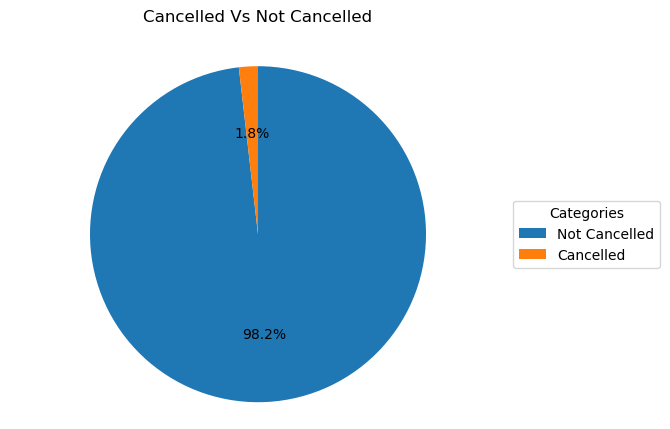

In [148]:
pie_chart(cleaned_airline_df, 'Cancelled','Cancelled Vs Not Cancelled', ['Not Cancelled', 'Cancelled'])

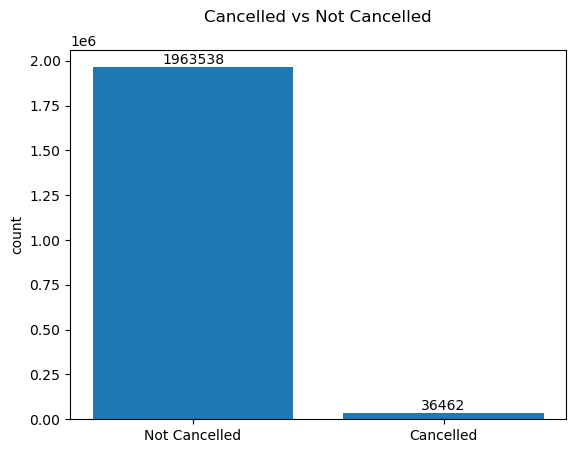

In [221]:
bar_chart(cleaned_airline_df, 'Cancelled', 'Cancelled vs Not Cancelled', ['Not Cancelled', 'Cancelled'] )

##### Cancelled Per week Day

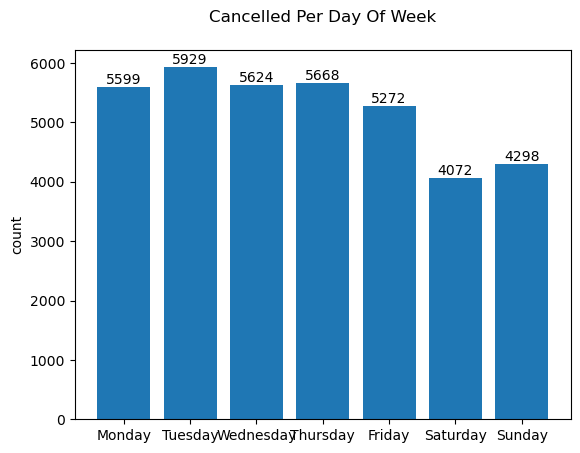

In [222]:
bar_chart(canceled_airline_df.sort_values(['DayOfWeek']),
        'DayOfWeek_Desc', 
        'Cancelled Per Day Of Week',)

##### Cancelled Per Quarter

In [151]:
canceled_airline_df['Quarter_Desc'].unique()

array(['Q3', 'Q2', 'Q1', 'Q4'], dtype=object)

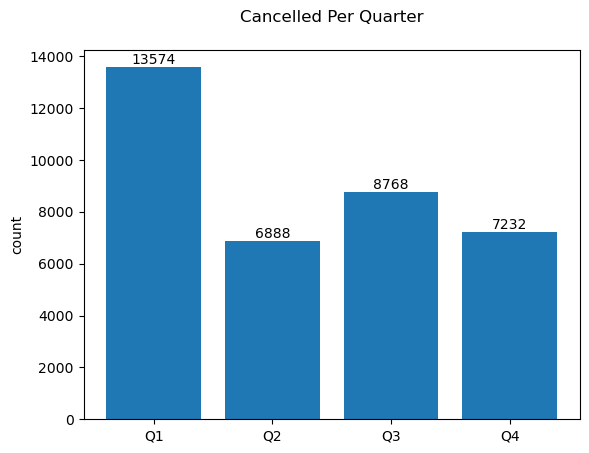

In [223]:
bar_chart(canceled_airline_df.sort_values(['Quarter']),
        'Quarter_Desc', 
        'Cancelled Per Quarter',)

##### Cancelled trip based On Cancellation Code

In [153]:
canceled_airline_df['CancellationCode'].unique()

array(['A', 'Not Defined', 'B', 'C', 'D'], dtype=object)

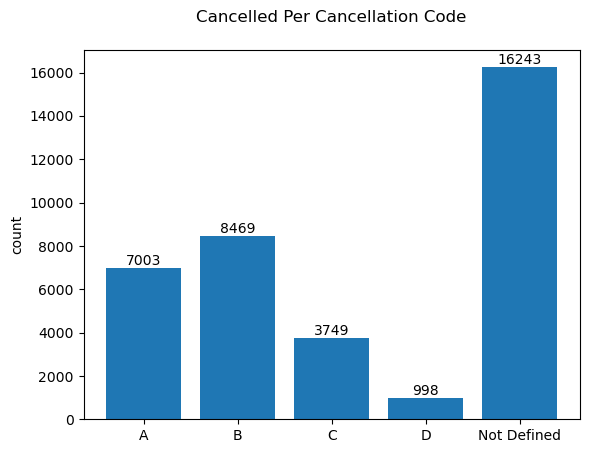

In [224]:
bar_chart(canceled_airline_df.sort_values(['CancellationCode']),
        'CancellationCode', 
        'Cancelled Per Cancellation Code')

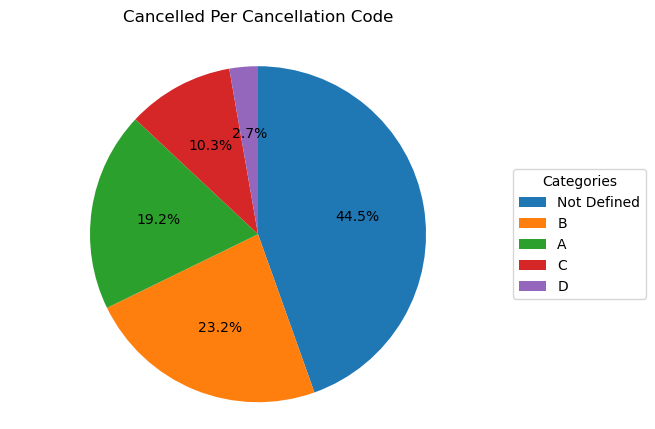

In [155]:
pie_chart(canceled_airline_df.sort_values(['CancellationCode']),
        'CancellationCode', 
        'Cancelled Per Cancellation Code')

Finding : 
1.8% of total trips were canceled. Analyzing cancellations by day of the week reveals that Fridays have fewer cancellations compared to other days, with the highest number of cancellations occurring on Tuesdays. When examining cancellations by quarter, it is evident that the number of cancellations is significantly higher in Q1 compared to other quarters

#### Diverted Trips

##### Diverted vs Not Diverted

Only 0.2% of the total observation is diverted 

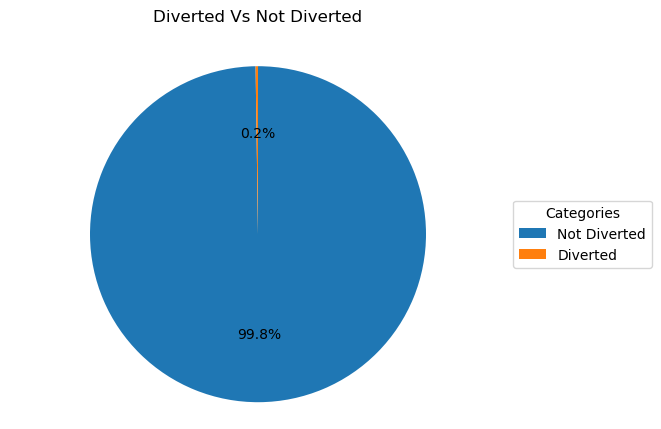

In [156]:
pie_chart(cleaned_airline_df, 'Diverted','Diverted Vs Not Diverted', ['Not Diverted', 'Diverted'])

From the bar chart below the number of observation per Diverted or not was shown 

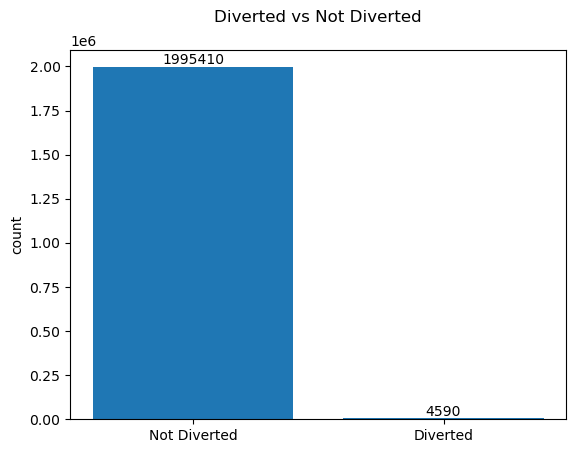

In [225]:
bar_chart(cleaned_airline_df, 'Diverted', 'Diverted vs Not Diverted', ['Not Diverted', 'Diverted'] )

##### Diverted Per week Day

In this section, we examine the pattern of diverted flights across different days of the week. However, no significant pattern emerges from the data.

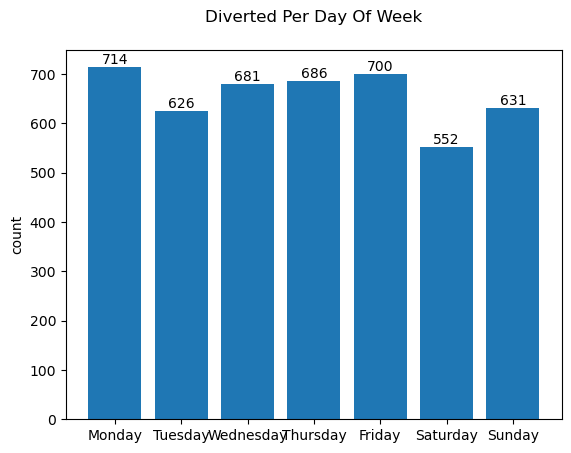

In [226]:
bar_chart(diverted_airline_df.sort_values(['DayOfWeek']),
        'DayOfWeek_Desc', 
        'Diverted Per Day Of Week',)

##### Diverted Per Quarter

In this section, we examine the pattern of diverted flights across different Quarters of the year. However, no significant pattern emerges from the data.

In [159]:
diverted_airline_df['Quarter_Desc'].unique()

array(['Q4', 'Q3', 'Q1', 'Q2'], dtype=object)

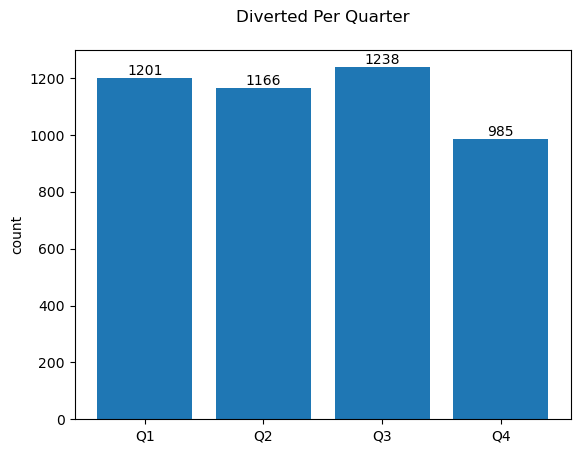

In [227]:
bar_chart(diverted_airline_df.sort_values(['Quarter']),
        'Quarter_Desc', 
        'Diverted Per Quarter',)

#### Distribution Of Arrival Delay Groups and DepartureDelayGroups

The histogram below illustrates the distribution of arrival and departure delays. It shows that most data points are concentrated at the lower end of the range, with only a small number extending into the higher end. This distribution is highly skewed to the right, indicating that while most flights experience minimal or no delays, there are a few significant delays that create a long tail on the right side of the chart

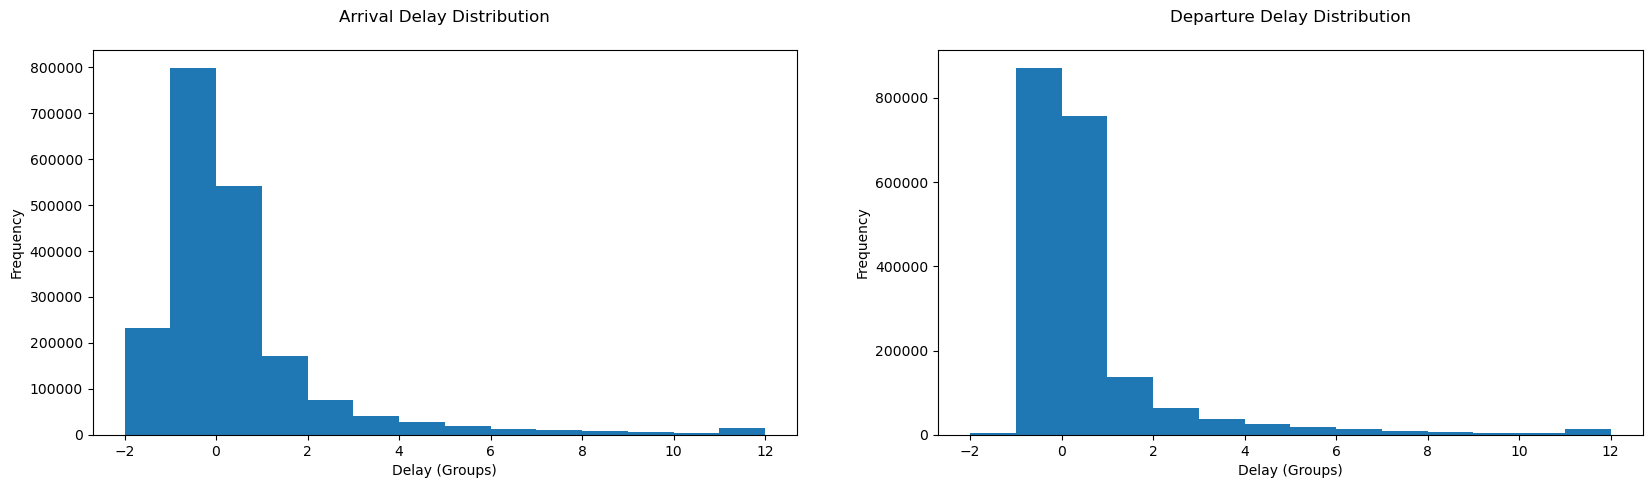

In [161]:
two_hist_chart(cleaned_airline_df, 
               ['ArrivalDelayGroups', 'DepartureDelayGroups'], 
               ['Arrival Delay Distribution', 'Departure Delay Distribution'],
                ['Delay (Groups)', 'Delay (Groups)'])

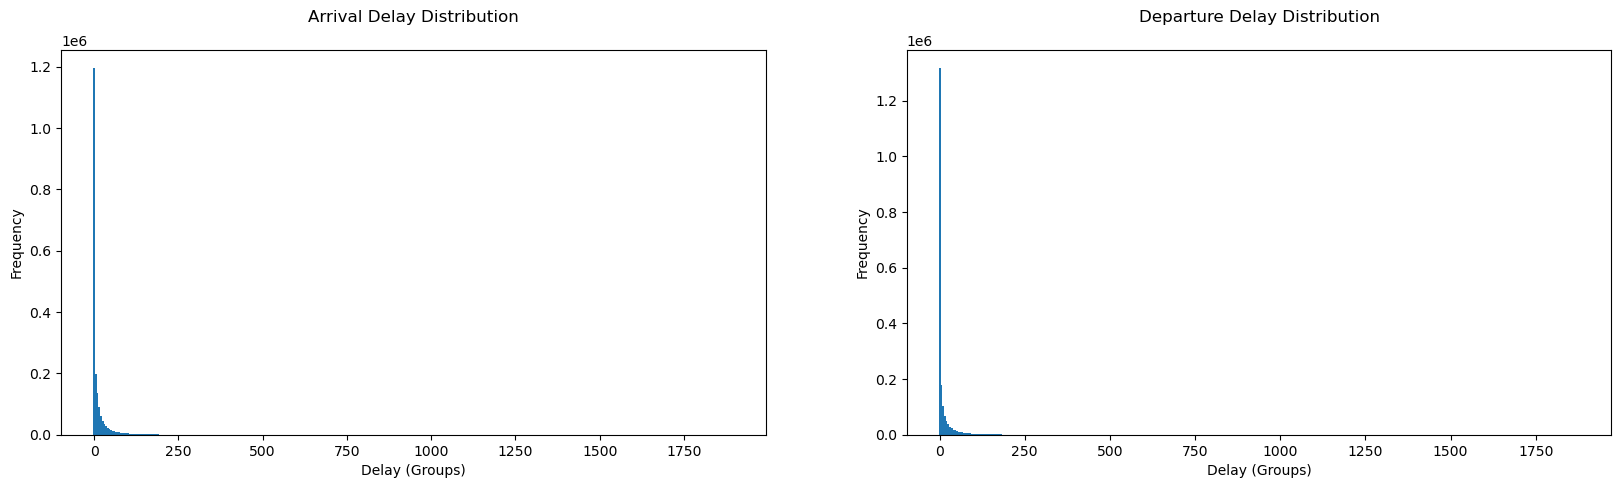

In [162]:
two_hist_chart(cleaned_airline_df, 
               ['ArrDelayMinutes', 'DepDelayMinutes'], 
               ['Arrival Delay Distribution', 'Departure Delay Distribution'],
                ['Delay (Groups)', 'Delay (Groups)'], 5)

Based on the above there exists outliers so we have to remove them

In [163]:
cleaned_airline_df['ArrDelayMinutes'].describe()

count    1.958922e+06
mean     1.179442e+01
std      3.197121e+01
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      1.000000e+01
max      1.898000e+03
Name: ArrDelayMinutes, dtype: float64

From the above: 
1. The average arrival delay in minutes across all flights is ~ 11 min
2. The minimum delay in minutes is ~ 0 min
3. 25% of the flights had no arrival delay - 25th Percentile (25%) 
4. 50% of the flights had no arrival delay - 50th Percentile (50%)
5. 75% of the flights had no arrival delay - 70th Percentile (70%)
6. The maximum delay in minutes is ~ 1898 minutes (about 31.6 hours)

In [164]:
cleaned_airline_df['DepDelayMinutes'].describe()

count    1.963932e+06
mean     1.049667e+01
std      3.196467e+01
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      7.000000e+00
max      1.878000e+03
Name: DepDelayMinutes, dtype: float64

From the above: 
1. The average departure delay in minutes across all flights is ~ 10 min
2. The minimum delay in minutes is ~ 0 min
3. 25% of the flights had no departure delay - 25th Percentile (25%) 
4. 50% of the flights had no departure delay - 50th Percentile (50%)
5. 75% of the flights had 7 minutes departure delay - 70th Percentile (70%)
6. The maximum delay in minutes is ~ 1878 minutes (about 31.3 hours)

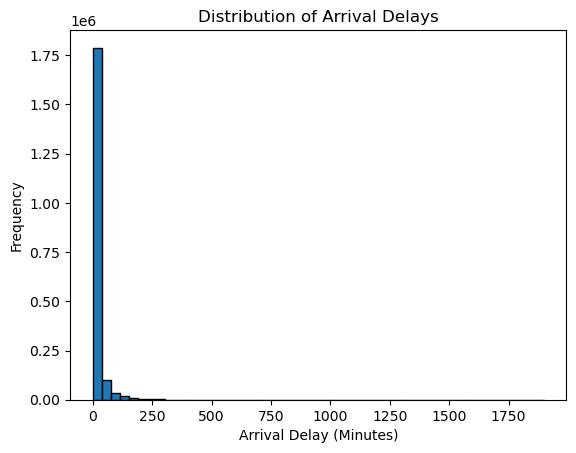

In [165]:
plt.hist(cleaned_airline_df['ArrDelayMinutes'].dropna(), bins=50, edgecolor='k')
plt.xlabel('Arrival Delay (Minutes)')
plt.ylabel('Frequency')
plt.title('Distribution of Arrival Delays')
plt.show()

#### Violin plots for arrival and departure delay

The violin plots for arrival and departure delays clearly demonstrate a highly skewed distribution, with most data concentrated around lower values. Delays up to 30 minutes fall predominantly within the first two delay groups, with a few extreme outliers. The overall delay data is categorized into 12 groups, with approximately 70% of the occurrences concentrated in the first three groups, as depicted in the pie chart below

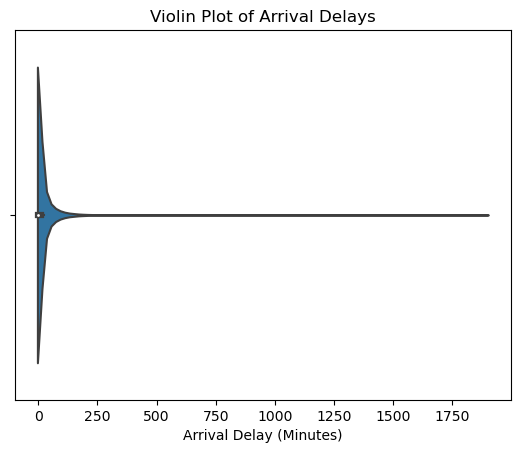

In [166]:
sns.violinplot(x=df['ArrDelayMinutes'].dropna())
plt.xlabel('Arrival Delay (Minutes)')
plt.title('Violin Plot of Arrival Delays')
plt.show()

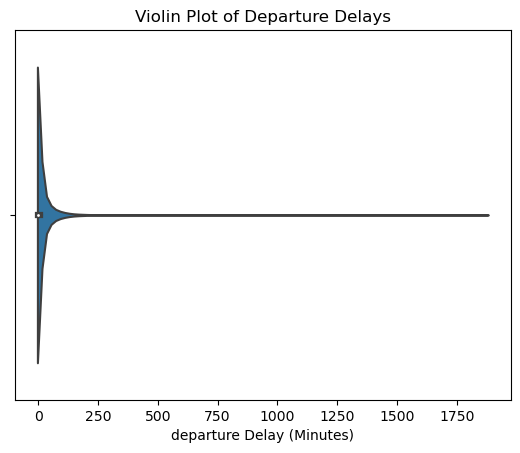

In [167]:
sns.violinplot(x=df['DepDelayMinutes'].dropna())
plt.xlabel('departure Delay (Minutes)')
plt.title('Violin Plot of Departure Delays')
plt.show()

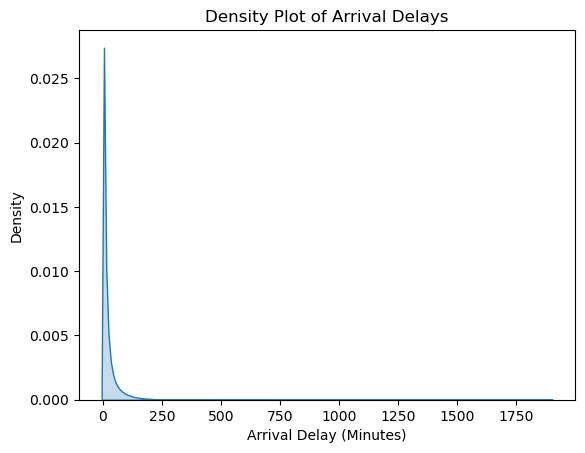

In [168]:
sns.kdeplot(df['ArrDelayMinutes'].dropna(), fill=True)
plt.xlabel('Arrival Delay (Minutes)')
plt.title('Density Plot of Arrival Delays')
plt.show()

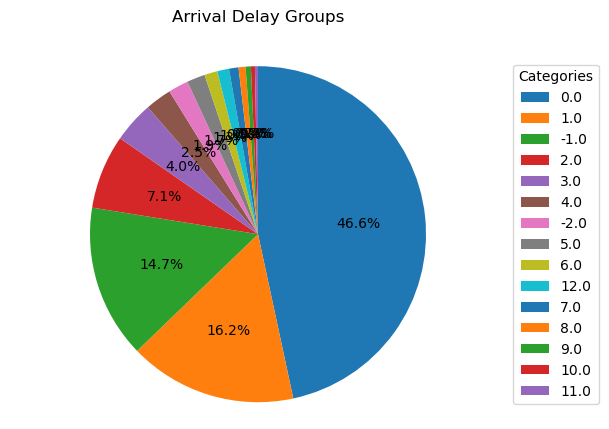

In [169]:
pie_chart(delay_airline_df, 'ArrivalDelayGroups','Arrival Delay Groups')

#### Outliers

##### Check for Departure Outliers

In this section, we are identifying outliers.

In [170]:
Check_for_Outliers(cleaned_airline_df, 'DepDelayMinutes', 'DepDelayMinutes')

upper_bound = 42.461333684338044 | lower_bound = -21.46799990292402
Count of outlier more than upper_bound = 137727
percentage  of outlier more than upper_bound = 6.89%


In [171]:
Check_for_Outliers(cleaned_airline_df, 'DepDelayMinutes', 'DepDelayMinutes',250)

upper_bound = 250 | lower_bound = -21.46799990292402
Count of outlier more than upper_bound = 4252
percentage  of outlier more than upper_bound = 0.21%


In [172]:
Check_for_Outliers(cleaned_airline_df, 'DepDelayMinutes', 'DepDelayMinutes',500)

upper_bound = 500 | lower_bound = -21.46799990292402
Count of outlier more than upper_bound = 591
percentage  of outlier more than upper_bound = 0.03%


In [173]:
Check_for_Outliers(cleaned_airline_df, 'DepDelayMinutes', 'DepDelayMinutes',1000)

upper_bound = 1000 | lower_bound = -21.46799990292402
Count of outlier more than upper_bound = 123
percentage  of outlier more than upper_bound = 0.01%


##### Remove Outliers
A new dataset will be created by removing DepDelayMinutes outliers that exceed 250 minutes, representing 0.21% of the total data

In [174]:
delay_airline_without_outliers_df = cleaned_airline_df[cleaned_airline_df['DepDelayMinutes']<250]
delay_airline_without_outliers_df.shape

(1959628, 87)

##### Check for Arrival Outliers

In [175]:
delay_airline_without_outliers_df['ArrDelayMinutes'].describe()

count    1.954667e+06
mean     1.103441e+01
std      2.614815e+01
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      1.000000e+01
max      1.430000e+03
Name: ArrDelayMinutes, dtype: float64

In [176]:
Check_for_Outliers(delay_airline_without_outliers_df, 'ArrDelayMinutes', 'ArrDelayMinutes')

upper_bound = 37.18256539942617 | lower_bound = -15.113741400248816
Count of outlier more than upper_bound = 166527
percentage  of outlier more than upper_bound = 8.5%


In [177]:
Check_for_Outliers(delay_airline_without_outliers_df, 'ArrDelayMinutes', 'ArrDelayMinutes',250)

upper_bound = 250 | lower_bound = -15.113741400248816
Count of outlier more than upper_bound = 635
percentage  of outlier more than upper_bound = 0.03%


##### Remove Arrival Outliers

In [178]:
# remove outliers 
delay_airline_without_outliers_df = delay_airline_without_outliers_df[
    delay_airline_without_outliers_df['ArrDelayMinutes']<250]
delay_airline_without_outliers_df.shape

(1954010, 87)

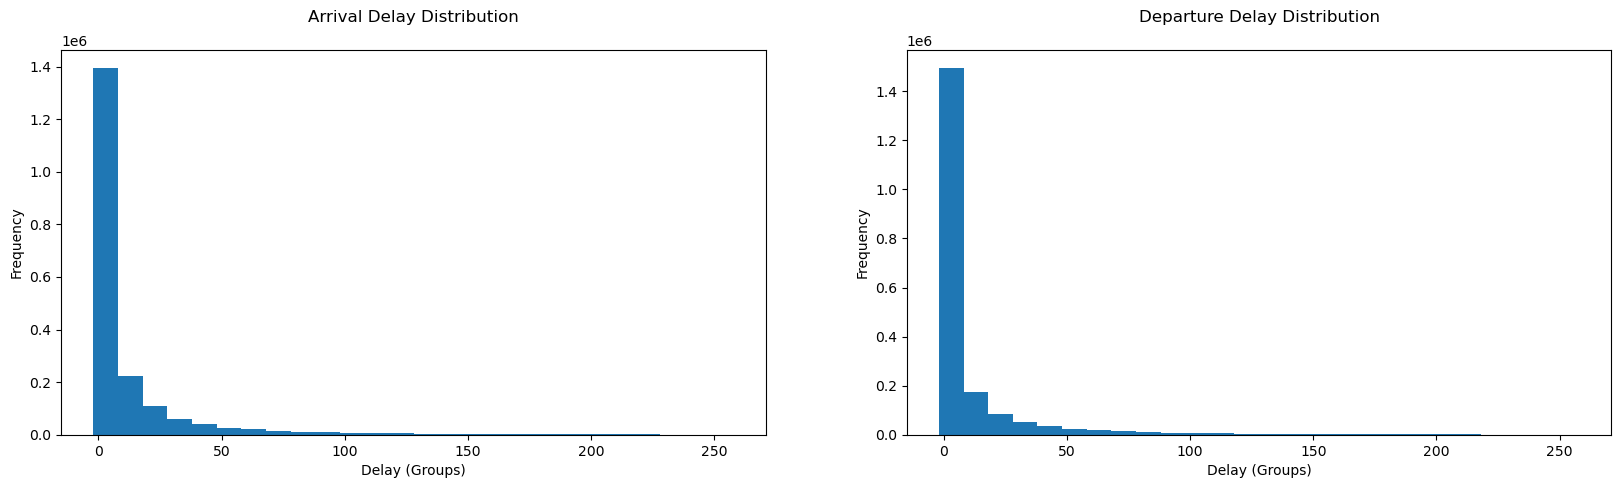

In [179]:
two_hist_chart(delay_airline_without_outliers_df, 
               ['ArrDelayMinutes', 'DepDelayMinutes'], 
               ['Arrival Delay Distribution', 'Departure Delay Distribution'],
                ['Delay (Groups)', 'Delay (Groups)'], 10)

## Bivariate Exploration

This section  involves analyzing the relationship between two variables to understand how they interact with each other. This analysis helps to identify patterns, correlations, and potential causal relationships between pairs of variables.

### Relation Between Arrival Delay & Departure Delay

A new DataFrame is generated to illustrate the relationship between arrival and departure delays, where delay minutes are un-pivoted. In this DataFrame, 'DelayMinutes' represents the value from either 'ArrDelayMinutes' or 'DepDelayMinutes', and 'DelayType' indicates 0 for departure delay and 1 for arrival delay.

Note: in this relationship the outliers is not removed to reflect the full image


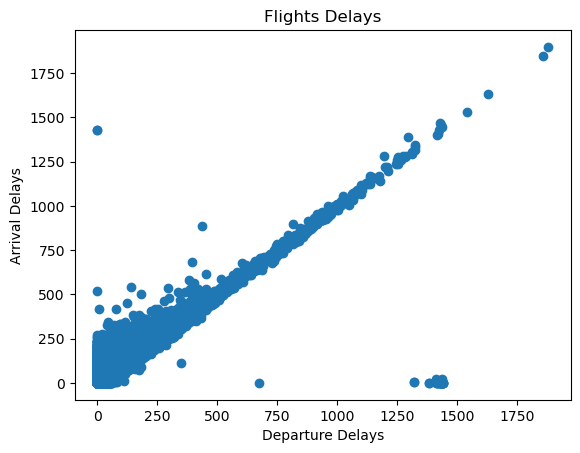

In [180]:
Scatter_plot(delay_airline_df,
             ['DepDelayMinutes', 'ArrDelayMinutes'],
             'Flights Delays',
             ['Departure Delays','Arrival Delays'])

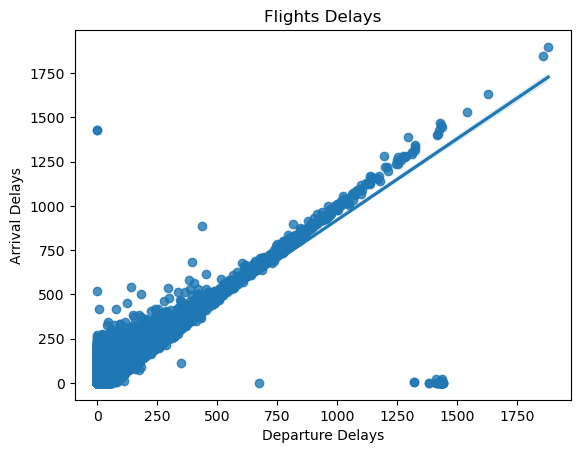

In [181]:
regression_scatter_plot(delay_airline_df,
             ['DepDelayMinutes', 'ArrDelayMinutes'],
             'Flights Delays',
             ['Departure Delays','Arrival Delays'])

There is a clear linear relationship between arrival and departure delays, indicating that as departure delay increases, arrival delay also tends to rise proportionally. Consequently, the longer a flight is delayed at departure, the more likely it is to be delayed upon arrival. This direct correlation underscores the importance of minimizing departure delays, as they can have a cascading effect on arrival times, potentially disrupting schedules and affecting subsequent flights.

#### Distance Air Time Relation

he scatter plot of Distance versus AirTime reveals a linear trend, meaning that as the distance of the flight increases, the air time also increases.

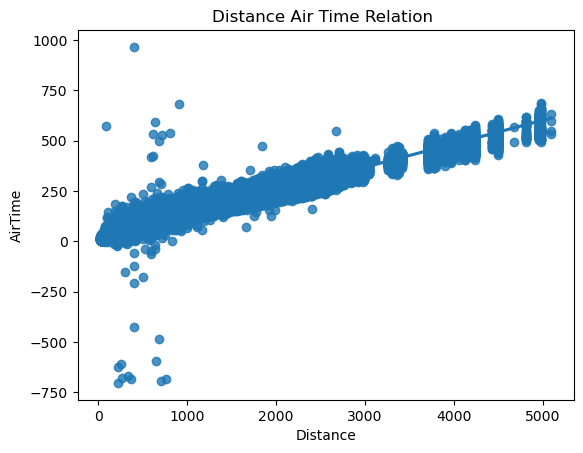

In [182]:
regression_scatter_plot(cleaned_airline_df,
             ['Distance', 'AirTime'],
             'Distance Air Time Relation ',
             ['Distance','AirTime'])

In [183]:
cleaned_airline_df[cleaned_airline_df['AirTime']< 0].shape

(29, 87)

In [184]:
cleaned_airline_df[(cleaned_airline_df['AirTime']< 0) & (cleaned_airline_df['Cancelled'] == 0)]

,Year,Quarter,Month,DayofMonth,DayOfWeek,FlightDate,Reporting_Airline,DOT_ID_Reporting_Airline,IATA_CODE_Reporting_Airline,Tail_Number,...,Div2Airport,Div2AirportID,Div2AirportSeqID,Div2WheelsOn,Div2TotalGTime,Div2LongestGTime,Div2WheelsOff,Div2TailNum,DayOfWeek_Desc,Quarter_Desc
18428,2004,4,10,26,2,2004-10-26,OH,20417,OH,N995CA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Tuesday,Q4
72219,2004,3,9,26,7,2004-09-26,OH,20417,OH,N712CA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Sunday,Q3
122559,2004,2,6,1,2,2004-06-01,OO,20304,OO,N298SW,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Tuesday,Q2
158307,2004,1,1,14,3,2004-01-14,OH,20417,OH,N34CA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Wednesday,Q1
222240,2004,2,6,4,5,2004-06-04,OH,20417,OH,N965CA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Friday,Q2
383878,2004,1,3,2,2,2004-03-02,OH,20417,OH,N498CA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Tuesday,Q1
422021,2004,3,8,15,7,2004-08-15,OH,20417,OH,N999CA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Sunday,Q3
433704,2004,1,1,3,6,2004-01-03,OH,20417,OH,N378CA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Saturday,Q1
471541,2004,4,12,22,3,2004-12-22,OH,20417,OH,N447CA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Wednesday,Q4
523068,2004,4,12,22,3,2004-12-22,OO,20304,OO,N443SW,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Wednesday,Q4


There exists 29 records where the flight time is less than zero and distance is greater than zero and the trip is not cancelled which can be marked as data issue 

### Delay Distribution 

In [185]:
delay_airline_df_copy = delay_airline_df.copy()

In [186]:
quarter_mapping = {1: 'q1', 2: 'q2', 3: 'q3', 4: 'q4'}
delay_airline_df_copy['Quarter_Desc'] = delay_airline_df_copy['Quarter'].map(quarter_mapping)

In [187]:
day_of_week_mapping = {
    1: 'Monday',
    2: 'Tuesday',
    3: 'Wednesday',
    4: 'Thursday',
    5: 'Friday',
    6: 'Saturday',
    7: 'Sunday'
}

# Apply the mapping to the 'DayOfWeek' column
delay_airline_df_copy['DayOfWeek_Desc'] = delay_airline_df_copy['DayOfWeek'].map(day_of_week_mapping)

In [188]:
delay_airline_df_copy['DayOfWeek_Desc']

0             Friday
2           Saturday
4             Sunday
5          Wednesday
6             Monday
             ...    
1999987       Monday
1999988       Friday
1999993     Thursday
1999995       Sunday
1999998      Tuesday
Name: DayOfWeek_Desc, Length: 1060475, dtype: object

#### Departure Delay Distribution by Quarter

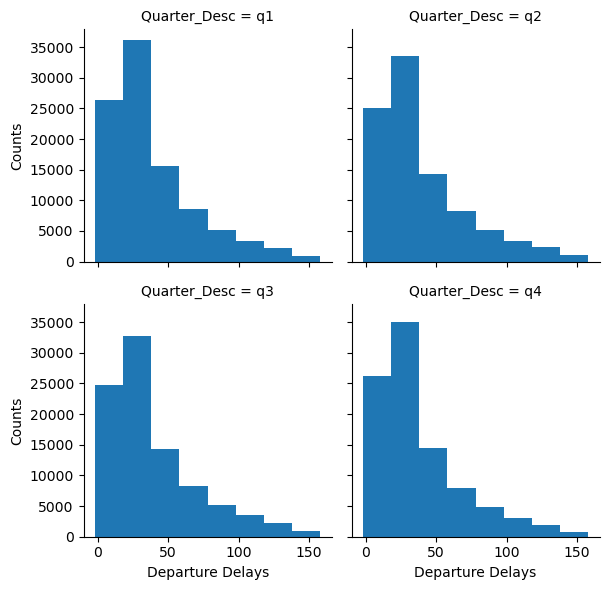

In [189]:
FacetGrid(delay_airline_df_copy[(delay_airline_df_copy['DepDelayMinutes']>10) & (delay_airline_df_copy['DepDelayMinutes']<150)],
           value_column='DepDelayMinutes',
           class_column='Quarter_Desc',
           bin_size=20,
           title='Flights Delays',
           xyLabels=['Departure Delays', 'Counts'])

there is no large differences in delay distribution per Quarter

#### Departure Delay Distribution by Day Of Week

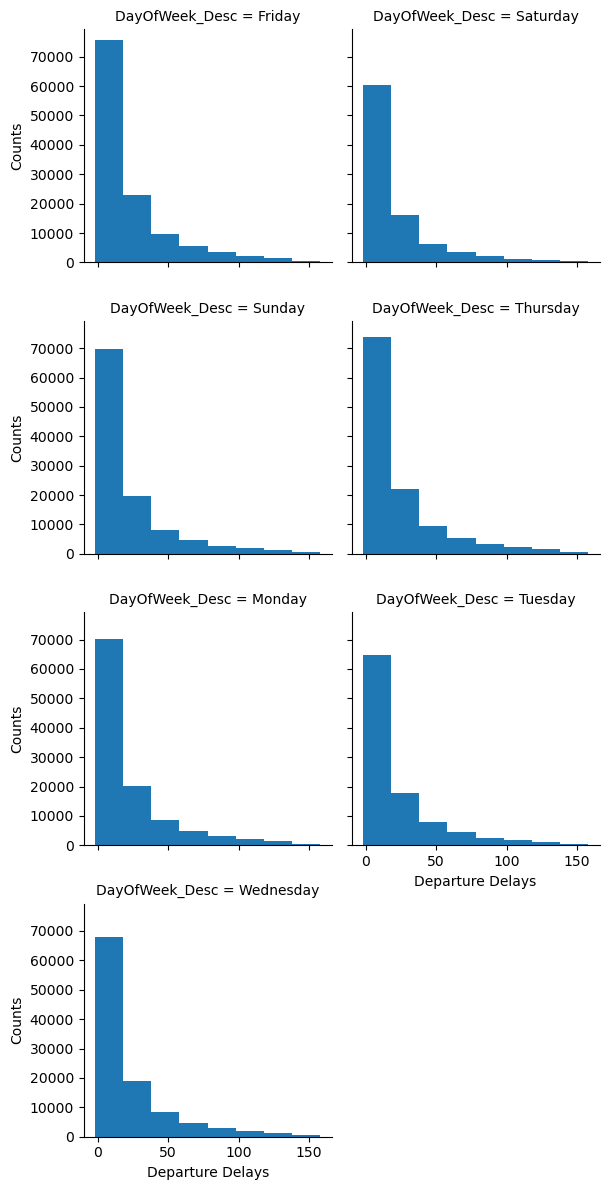

In [190]:
FacetGrid(delay_airline_df_copy[(delay_airline_df_copy['DepDelayMinutes']>0) & (delay_airline_df_copy['DepDelayMinutes']<150)],
           value_column='DepDelayMinutes',
           class_column='DayOfWeek_Desc',
           bin_size=20,
           title='Flights Delays',
           xyLabels=['Departure Delays', 'Counts'])

** Delay Distribution on saturday is less than the rest of the other week days 

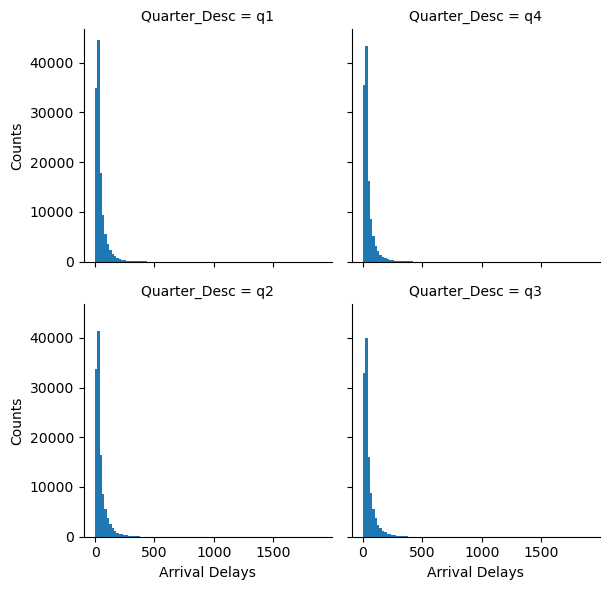

In [191]:
FacetGrid(delay_airline_df_copy[(delay_airline_df_copy['ArrDelayMinutes']>10) ],
           value_column='ArrDelayMinutes',
           class_column='Quarter_Desc',
           bin_size=20,
           title='Flights Delays',
           xyLabels=['Arrival Delays', 'Counts'])

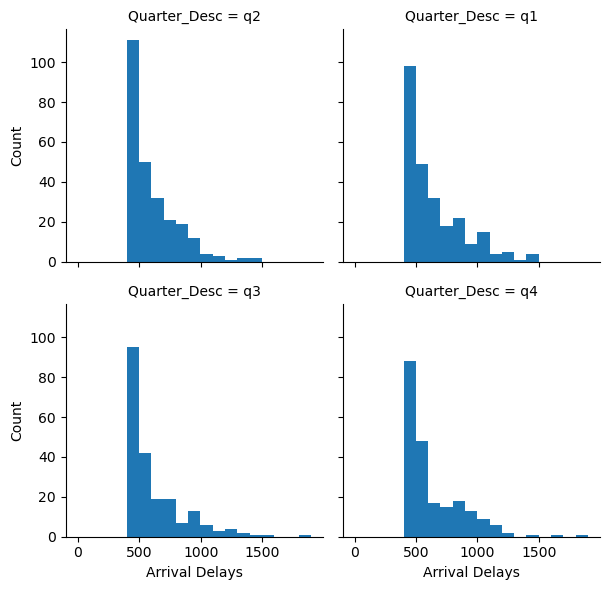

In [192]:
FacetGrid(delay_airline_df_copy[(delay_airline_df_copy['ArrDelayMinutes']>400) ],
           value_column='ArrDelayMinutes',
           class_column='Quarter_Desc',
           bin_size=100,
           title='Flights Delays',
           xyLabels=['Arrival Delays', 'Count'])

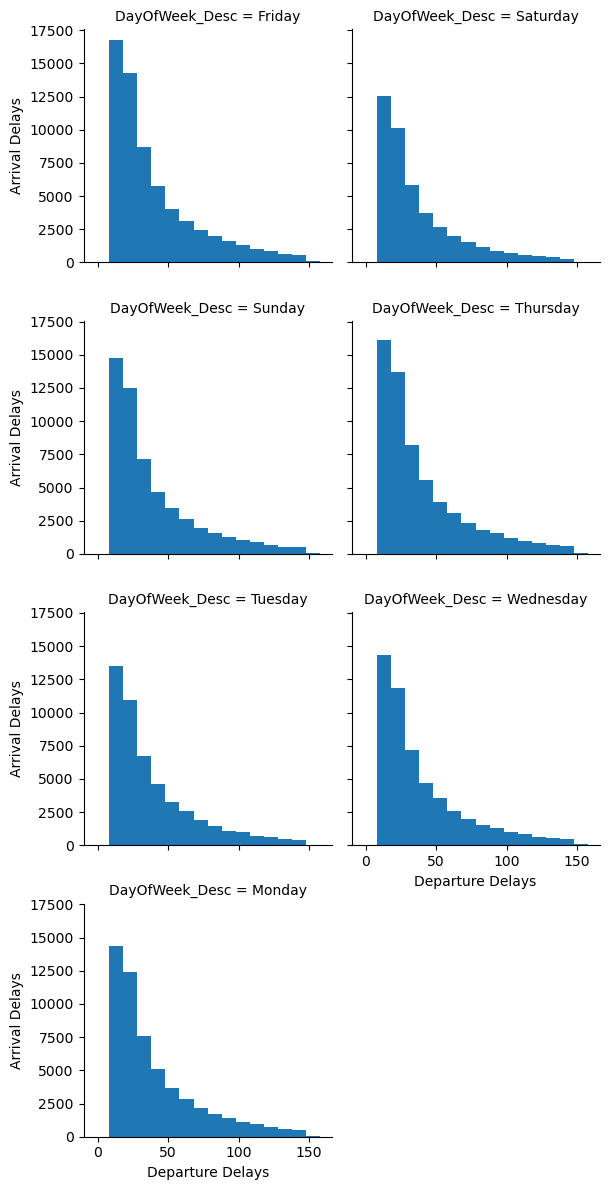

In [193]:
FacetGrid(delay_airline_df_copy[(delay_airline_df_copy['DepDelayMinutes']>10) & (delay_airline_df_copy['DepDelayMinutes']<150)],
          'DepDelayMinutes',
          'DayOfWeek_Desc',
           10,
          'Flights Delays',
          ['Departure Delays','Arrival Delays'])

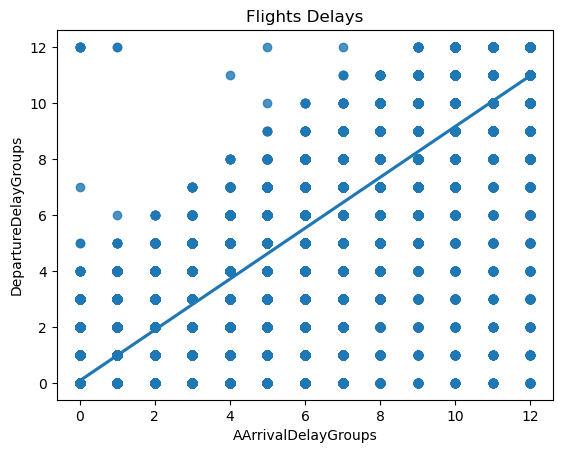

In [194]:
regression_scatter_plot( delay_airline_df[(delay_airline_df['ArrDelayMinutes']>0) & (delay_airline_df['DepDelayMinutes']>0)],
    ['ArrivalDelayGroups', 'DepartureDelayGroups'],
    'Flights Delays',
    ['AArrivalDelayGroups','DepartureDelayGroups'])

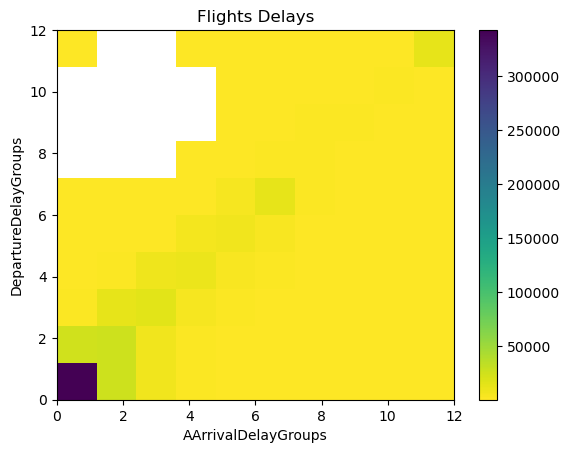

In [235]:
heat_map(
    delay_airline_df[(delay_airline_df['ArrDelayMinutes']>0) & (delay_airline_df['DepDelayMinutes']>0)],
    ['ArrivalDelayGroups', 'DepartureDelayGroups'],
    'Flights Delays',
    ['AArrivalDelayGroups','DepartureDelayGroups'])

Is there a relation between delay more than 15 min with flight destance?

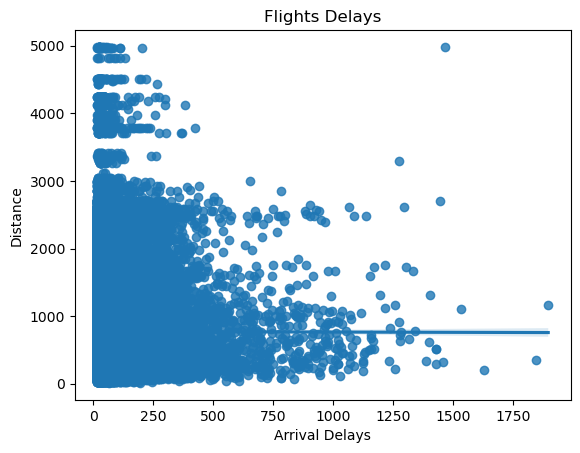

In [196]:
regression_scatter_plot(delay_airline_df[delay_airline_df['ArrDelayMinutes']>15],
             ['ArrDelayMinutes', 'Distance'],
             'Flights Delays',
             ['Arrival Delays','Distance'])

conclusion: there is no relationship between distance and Arrival delay

By analyzing the heatmap below, it is evident that the values are predominantly concentrated in the arrival delay of 20 minutes within Distance Group 2. This is followed by Distance Group 4, then Group 1, and Group 5.

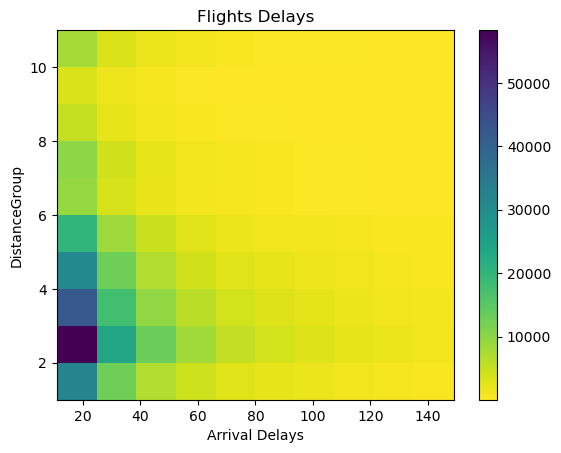

In [197]:
heat_map(
    delay_airline_df[(delay_airline_df['ArrDelayMinutes']>10) & (delay_airline_df['ArrDelayMinutes']<150)],
    ['ArrDelayMinutes', 'DistanceGroup'],
    'Flights Delays',
    ['Arrival Delays','DistanceGroup'])


In the heatmap below, the feature used is the arrival delay group rather than minutes, yet it yields the same result.

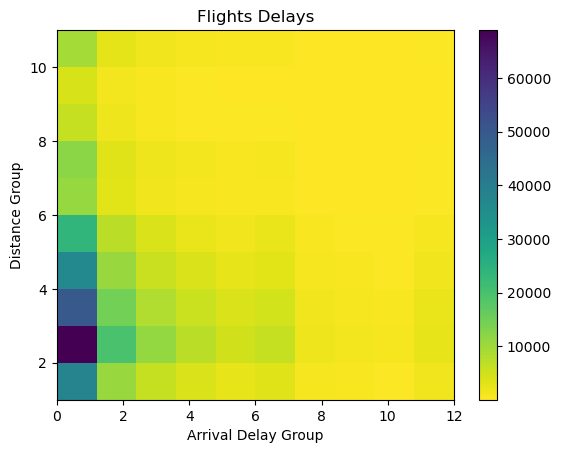

In [198]:
heat_map(
    delay_airline_df[(delay_airline_df['ArrDelayMinutes']>10) & (delay_airline_df['ArrDelayMinutes']<250)],
    ['ArrivalDelayGroups', 'DistanceGroup'],
    'Flights Delays',
    ['Arrival Delay Group','Distance Group'])

Observe the distribution pattern of points for CarrierDelay with Arrival Delays

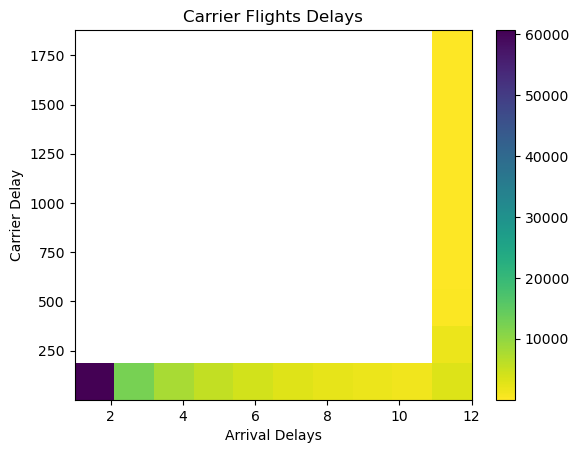

In [199]:
heat_map(
    delay_airline_df[delay_airline_df['CarrierDelay']>0],
    ['ArrivalDelayGroups', 'CarrierDelay'],
    'Carrier Flights Delays',
    ['Arrival Delays','Carrier Delay'])

Observe the distribution pattern of points for WeatherDelay with Arrival Delays

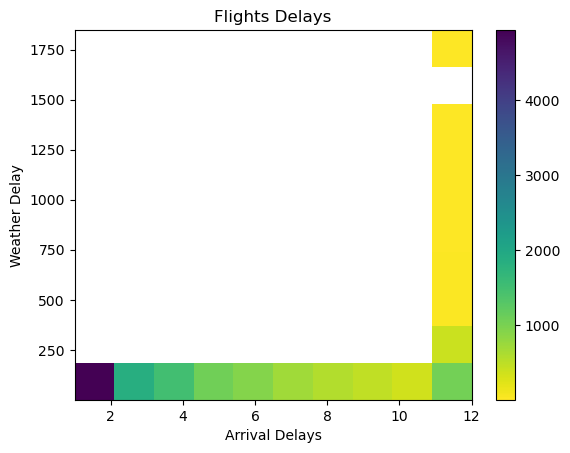

In [200]:
heat_map(
    delay_airline_df[delay_airline_df['WeatherDelay']>0],
    ['ArrivalDelayGroups', 'WeatherDelay'],
    'Flights Delays',
    ['Arrival Delays','Weather Delay'])

Observe the distribution pattern of points for NAS Delay with Arrival Delays

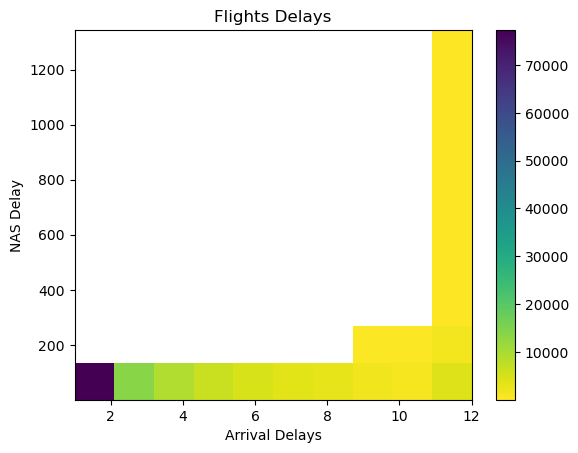

In [201]:
heat_map(
    delay_airline_df[delay_airline_df['NASDelay']>0],
    ['ArrivalDelayGroups', 'NASDelay'],
    'Flights Delays',
    ['Arrival Delays','NAS Delay'])

Observe the distribution pattern of points for SecurityDelay with Arrival Delays

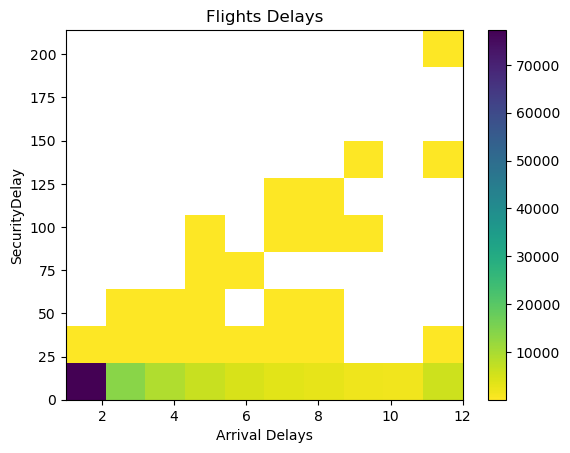

In [202]:
heat_map(
    delay_airline_df[delay_airline_df['NASDelay']>0],
    ['ArrivalDelayGroups', 'SecurityDelay'],
    'Flights Delays',
    ['Arrival Delays','SecurityDelay'])

Observe the distribution pattern of points for LateAircraftDelay with Arrival Delays

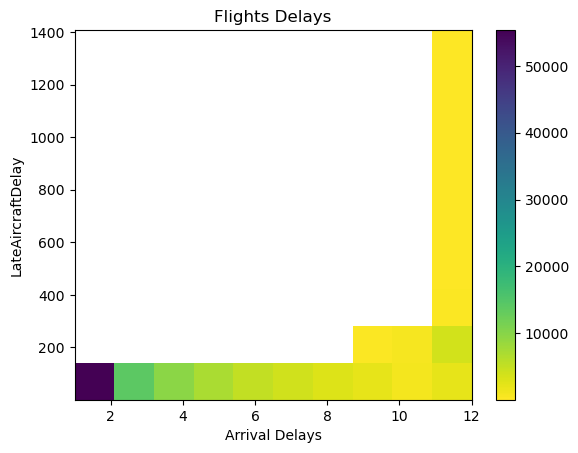

In [203]:
heat_map(
    delay_airline_df[delay_airline_df['LateAircraftDelay']>0],
    ['ArrivalDelayGroups', 'LateAircraftDelay'],
    'Flights Delays',
    ['Arrival Delays','LateAircraftDelay'])

In [204]:
unpivoted_delay_type_df = pd.melt(
    delay_airline_df,  # Pass the DataFrame directly
    value_vars=['DepDelayMinutes', 'ArrDelayMinutes'],  # Specify the columns to unpivot
    var_name='DelayType',  # Name for the new variable column
    value_name='DelayMinutes'  # Name for the new value column
)

# Map 'DelayType' to 0 for 'DepDelayMinutes' and 1 for 'ArrDelayMinutes'
unpivoted_delay_type_df['DelayType'] = unpivoted_delay_type_df['DelayType'].map({
    'DepDelayMinutes': 0,
    'ArrDelayMinutes': 1
})

# View the new DataFrame
unpivoted_delay_type_df.head()

,DelayType,DelayMinutes
0,0,19.0
1,0,14.0
2,0,51.0
3,0,0.0
4,0,0.0


In [205]:
unpivoted_delay_type_df.tail()

,DelayType,DelayMinutes
2120945,1,0.0
2120946,1,1.0
2120947,1,4.0
2120948,1,0.0
2120949,1,0.0


In [206]:
unpivoted_delay_type_df.shape

(2120950, 2)

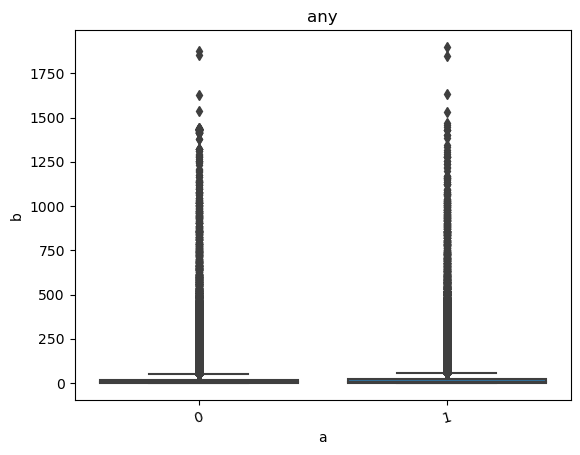

In [207]:
# show scatter plot for Arrival delay 
box_plot(unpivoted_delay_type_df,'DelayType',['dep', 'arr'],'DelayMinutes','any',['a','b'])

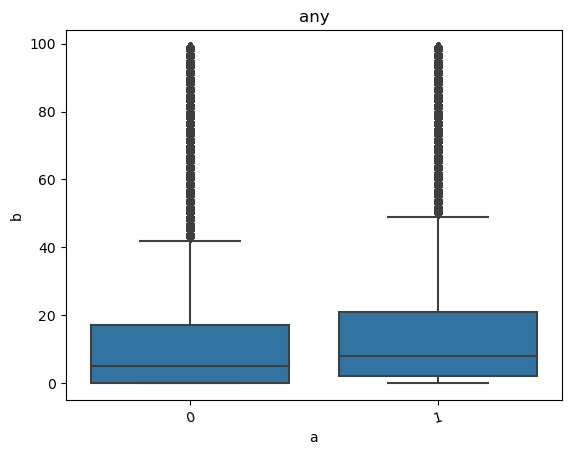

In [208]:
# show scatter plot for Arrival delay 
box_plot(unpivoted_delay_type_df[unpivoted_delay_type_df['DelayMinutes']<100]
         ,'DelayType',
         ['dep', 'arr'],
         'DelayMinutes',
         'any',
         ['a','b'])

In [209]:
Reporting_Airline_count = df['Reporting_Airline'].value_counts()
print(Reporting_Airline_count)

WN        306238
DL        264455
AA        234730
UA        194294
US        172532
NW        109336
OO        107153
CO         90931
MQ         78113
EV         67600
AS         49656
TW         38531
B6         37638
HP         37630
XE         35645
FL         25954
OH         24786
YV         22555
9E         19666
F9         14320
HA         11683
EA          9375
PI          8954
NK          8647
YX          7569
DH          7165
VX          3994
PA (1)      3168
G4          2306
TZ          2163
KH          1576
PS           867
ML (1)       770
Name: Reporting_Airline, dtype: int64


In [210]:
year_count = df['Year'].value_counts()
print(year_count)

2019    76616
2007    76529
2018    74175
2006    73814
2004    73200
2005    73152
2008    72133
2003    66456
2010    66425
2009    66360
2013    65957
2012    62813
2011    62672
2001    61551
2015    59876
2014    59668
2000    58587
2017    58361
2016    57729
1999    56772
1997    55506
1998    55380
1996    54976
1990    54709
1995    54653
2002    54031
1988    53333
1994    53325
1993    52438
1992    52360
1989    52028
1991    52006
2020    18905
1987    13504
Name: Year, dtype: int64


## Multivariate Exploration

 This section involves analyzing the relationships between multiple variables simultaneously to uncover insights that might not be apparent when examining individual variables in isolation. In our analysis of airline flight performance, we focused on Correlation Analysis for many delay feature


### Correlation between delay Features, distance and flight time 

Based on the correlation matrix, we can draw the following conclusions:

1. Departure Delay and Arrival Delay: There is a very strong positive correlation between DepDelayMinutes and ArrDelayMinutes. This indicates that flights with longer departure delays tend to experience longer arrival delays as well.

2. Arrival Delay and Late Aircraft Delay: A moderate positive correlation exists between ArrDelayMinutes and LateAircraftDelay. This suggests that significant delays caused by late aircraft are associated with increased arrival delays, though this relationship is less pronounced than with departure delays.

3. Departure Delay and Late Aircraft Delay: There is a moderate positive correlation between DepDelayMinutes and LateAircraftDelay. This implies that flights with longer departure delays are somewhat likely to experience delays due to late aircraft.

4. Distance Group and AirTime: A very strong positive correlation is observed between DistanceGroup and AirTime. This indicates that longer distances are strongly associated with longer flight durations, which aligns with the expectation that flights covering greater distances require more time in the air.

In [213]:
correlation_columns = [
'DepDelayMinutes',
'ArrDelayMinutes',
'CarrierDelay',     
'WeatherDelay',    
'NASDelay',             
'SecurityDelay',      
'LateAircraftDelay',
'DistanceGroup',
'AirTime',
]

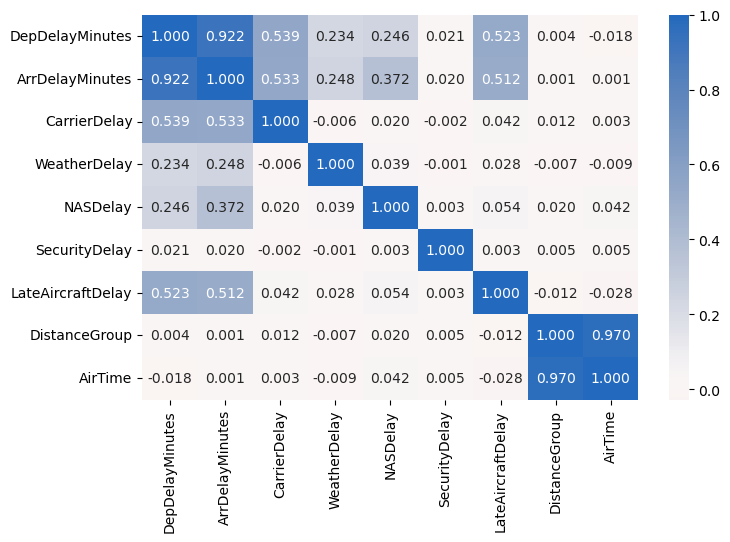

In [214]:
# correlation plot

plt.figure(figsize = [8, 5])
sb.heatmap(delay_airline_df[correlation_columns].corr(), annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = 0)
plt.show()

### Cancellation based On Cancellation Code

Examining the causes of cancellations, it is notably that in Quarter 1, cause B is the predominant reason for cancellations, with a markedly higher count than in other quarters. Cause D is exclusively observed in Quarter 1. In contrast, cause A is the primary reason for cancellations in both Quarter 2 and Quarter 3.

In [215]:
# Aggregate the data to get counts for each combination of 'Quarter_Desc' and 'CancellationCode'
canceled_airline_df_agg = canceled_airline_df.groupby(['Quarter_Desc', 'CancellationCode']).size().reset_index(name='Count')
canceled_airline_df_agg.head(10)

,Quarter_Desc,CancellationCode,Count
0,Q1,A,1953
1,Q1,B,3842
2,Q1,C,906
3,Q1,D,988
4,Q1,Not Defined,5885
5,Q2,A,1757
6,Q2,B,1321
7,Q2,C,915
8,Q2,D,3
9,Q2,Not Defined,2892


In [216]:
canceled_airline_df_agg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Quarter_Desc      20 non-null     object
 1   CancellationCode  20 non-null     object
 2   Count             20 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 608.0+ bytes


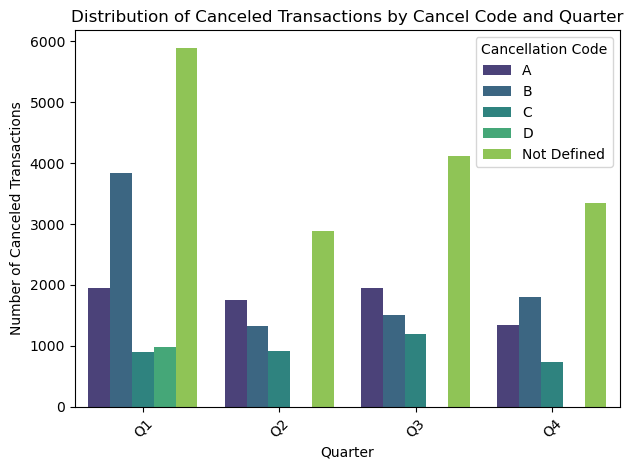

In [217]:


# Plotting
sns.barplot(data=canceled_airline_df_agg, x='Quarter_Desc', y='Count', hue='CancellationCode', palette='viridis')

# Title and labels
plt.title('Distribution of Canceled Transactions by Cancel Code and Quarter')
plt.xlabel('Quarter')
plt.ylabel('Number of Canceled Transactions')


plt.legend(title='Cancellation Code')
plt.xticks(rotation=45)
plt.tight_layout()
